# Task 2: Exploratory Data Analysis

For Task 2 we run an Exploratory Data Analysis (EDA). It helps us understand the data, check its quality, select relevant features, identify patterns and trends, visualize the data, and generate hypotheses. Our EDA allows you to gain insights into the structure, relationships, and characteristics of our provided data. It helps you assess data quality, detect outliers or errors, and make informed decisions on preprocessing. By exploring patterns and correlations, EDA uncovers valuable information about the factors influencing fitness outcomes. Visualizations aid in effective communication and the identification of meaningful patterns.

### Imports

In [326]:
import os
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sweat
import missingno as msno


from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
# also add the folder path for future use
folder_path = ('00Data')

### Method File Name Fixing (run if needed)
After extracting the fit files from the zip folders, they appear to have a different filename structure than the others. For the upcoming work we'll align the filenames.

In [42]:
def rename_fit_files(folder_path):
    # list all files in the folder with .fit extension
    file_names = [f for f in os.listdir(folder_path) if f.endswith('.fit')]

    for file_name in file_names:
        # extract the activity ID from the file name and create new file name
        activity_id = file_name.split('_')[0]
        new_file_name = f"activity_{activity_id}.fit"

        # get the full path of the original and new file names
        original_path = os.path.join(folder_path, file_name)
        new_path = os.path.join(folder_path, new_file_name)

        # rename the file
        os.rename(original_path, new_path)

In [43]:
# run method if needed
#rename_fit_files(folder_path)

In [57]:
# show files
file_names = [f for f in os.listdir(folder_path) if f.endswith(('.fit', '.gpx', '.tcx'))]
file_names

['activity_10635316266.gpx',
 'activity_10608368604.tcx',
 'activity_10585932935.fit',
 'activity_10652837599.tcx',
 'activity_10625155519.fit',
 'activity_10579366115.gpx',
 'activity_10592753796.gpx',
 'activity_10635316266.tcx',
 'activity_10608368604.gpx',
 'activity_10632152119.fit',
 'activity_10660661255.fit',
 'activity_10615382190.fit',
 'activity_10619331515.fit',
 'activity_10599374000.fit',
 'activity_10652837599.gpx',
 'activity_10659137799.fit',
 'activity_10579366115.tcx',
 'activity_10646030031.fit',
 'activity_10628179747.fit',
 'activity_10592753796.tcx',
 'activity_10639387795.gpx',
 'activity_10640071352.fit',
 'activity_10660660034.tcx',
 'activity_10595880312.gpx',
 'activity_10582299967.fit',
 'activity_10587871739.tcx',
 'activity_10612828555.fit',
 'activity_10641954242.fit',
 'activity_10655142510.fit',
 'activity_10660660034.gpx',
 'activity_10642787751.fit',
 'activity_10575451215.fit',
 'activity_10639387795.tcx',
 'activity_10595880312.tcx',
 'activity_105

### Data Loading to dataframe
We load the data into 3 different data frames:
- .fit data
- .gpx data
- .tcx data
While running through the different files we also save their respective file name in a new column so we can trace back the different excersise methods.

After setting up our method we realized, that the activity file 'activity_10659137799.tcx' had to be corrupted, since every attempt to open it resulted in a failure. We decided to primarily exclude the file and use the data gained from the fit file for this instance.


In [330]:
# List all files in the folder with .fit, .gpx, and .tcx extensions
file_names = [f for f in os.listdir(folder_path) if f.endswith(('.fit', '.gpx', '.tcx'))]

# Load data from each file format into separate dataframes
fit_dataframes = []
gpx_dataframes = []
tcx_dataframes = []
activity_ids = []

for file_name in file_names:
    if file_name == 'activity_10659137799.tcx':
        continue

    file_path = os.path.join(folder_path, file_name)

    # Extract activity ID from file name
    activity_id = file_name.split('_')[1].split('.')[0]
    activity_ids.append(activity_id)

    try:
        if file_name.endswith('.fit'):
            dataframe = sweat.read_fit(file_path)
            dataframe.insert(0, 'Activity ID', activity_id)  # Insert activity ID as first column
            dataframe['timestamp'] = dataframe.index  # Add a 'timestamp' column with the index values
            fit_dataframes.append(dataframe)

        elif file_name.endswith('.gpx'):
            dataframe = sweat.read_gpx(file_path)
            dataframe.insert(0, 'Activity ID', activity_id)  # Insert activity ID as first column
            dataframe['timestamp'] = dataframe.index  # Add a 'timestamp' column with the index values
            gpx_dataframes.append(dataframe)

        elif file_name.endswith('.tcx'):
            dataframe = sweat.read_tcx(file_path)
            dataframe.insert(0, 'Activity ID', activity_id)  # Insert activity ID as first column
            dataframe['timestamp'] = dataframe.index  # Add a 'timestamp' column with the index values
            tcx_dataframes.append(dataframe)

    # had to write an exception since we encountered faulty files
    except Exception as e:
        print(f"Error occurred while reading file {file_name}: {str(e)}")

In [331]:
# Concatenate
fit_df = pd.concat(fit_dataframes, ignore_index=True)
tcx_df = pd.concat(tcx_dataframes, ignore_index=True)
gpx_df = pd.concat(gpx_dataframes, ignore_index=True)

### Data Overview
Overviewing the data allows us to gain a better understanding of the data we are working with, including its characteriscs, and patterns.

We want to get a rough sketch of the data set, its size, and gain first impressions.
Therefore, we have a look at the first and the last five rows and of a random data sample of 2ß rows of the complete data set.

In [282]:
print(fit_df.info())
print(gpx_df.info())
print(tcx_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134335 entries, 0 to 134334
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   Activity ID           134335 non-null  object             
 1   heartrate             134330 non-null  float64            
 2   temperature           0 non-null       object             
 3   unknown_135           24251 non-null   float64            
 4   unknown_136           24251 non-null   float64            
 5   sport                 134335 non-null  object             
 6   record_sequence       134335 non-null  int64              
 7   session               134335 non-null  int64              
 8   lap                   134335 non-null  int64              
 9   timestamp             134335 non-null  datetime64[ns, UTC]
 10  latitude              112174 non-null  float64            
 11  longitude             112174 non-null  float64      

In [171]:
fit_df.head(20)

,Activity ID,heartrate,temperature,unknown_135,unknown_136,sport,record_sequence,session,lap,timestamp,...,unknown_87,cadence,activity_type,fractional_cadence,unknown_107,unknown_134,unknown_137,unknown_138,unknown_108,unknown_90
0,10585932935,70.0,None,7.0,70.0,swimming,0,0,0,2023-02-26 07:39:59+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10585932935,70.0,None,7.0,70.0,swimming,1,0,0,2023-02-26 07:40:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10585932935,71.0,None,15.0,71.0,swimming,2,0,0,2023-02-26 07:40:01+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10585932935,72.0,None,16.0,72.0,swimming,3,0,0,2023-02-26 07:40:02+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10585932935,73.0,None,18.0,73.0,swimming,4,0,0,2023-02-26 07:40:03+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10585932935,74.0,None,19.0,74.0,swimming,5,0,0,2023-02-26 07:40:04+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10585932935,75.0,None,20.0,75.0,swimming,6,0,0,2023-02-26 07:40:05+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10585932935,76.0,None,20.0,76.0,swimming,7,0,0,2023-02-26 07:40:06+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10585932935,77.0,None,19.0,77.0,swimming,8,0,0,2023-02-26 07:40:07+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10585932935,77.0,None,19.0,77.0,swimming,9,0,0,2023-02-26 07:40:08+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
fit_df.columns

Index(['Activity ID', 'heartrate', 'temperature', 'unknown_135', 'unknown_136',
       'sport', 'record_sequence', 'session', 'lap', 'timestamp', 'latitude',
       'longitude', 'distance', 'accumulated_power', 'enhanced_speed',
       'enhanced_altitude', 'unknown_140', 'power', 'vertical_oscillation',
       'stance_time_percent', 'stance_time', 'vertical_ratio',
       'stance_time_balance', 'step_length', 'unknown_87', 'cadence',
       'activity_type', 'fractional_cadence', 'unknown_107', 'unknown_134',
       'unknown_137', 'unknown_138', 'unknown_108', 'unknown_90'],
      dtype='object')

In [173]:
fit_df.describe()

,heartrate,unknown_135,unknown_136,record_sequence,session,lap,latitude,longitude,distance,accumulated_power,...,step_length,unknown_87,cadence,fractional_cadence,unknown_107,unknown_134,unknown_137,unknown_138,unknown_108,unknown_90
count,134330.000000,24251.000000,24251.000000,134335.000000,134335.0,134335.000000,112174.000000,112174.000000,112174.00000,9.592100e+04,...,13984.000000,95714.000000,95714.000000,95714.000000,112174.000000,99329.000000,112169.000000,112169.000000,104610.000000,74385.000000
mean,119.324566,55.562657,111.140572,4965.584755,0.0,9.724137,29.043861,-13.568217,45102.30695,1.248587e+06,...,1129.440646,0.289080,74.104300,0.037168,0.999002,95.168581,64.312725,64.278910,2995.392907,-0.357774
std,14.738988,24.216176,13.688478,4408.868026,0.0,7.979385,0.074025,0.109602,35989.46531,9.090705e+05,...,67.490702,49.528232,21.859002,0.131159,0.031583,21.443039,20.800986,20.836884,485.090503,3.028015
min,59.000000,0.000000,61.000000,0.000000,0.0,0.000000,28.865344,-13.834951,0.00000,1.000000e+00,...,474.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,19.000000,1150.000000,-7.000000
25%,112.000000,39.000000,102.000000,1345.000000,0.0,3.000000,28.992665,-13.636322,10499.42500,4.322550e+05,...,1092.000000,0.000000,71.000000,0.000000,1.000000,100.000000,47.000000,47.000000,2720.000000,-2.000000
50%,122.000000,57.000000,113.000000,3239.000000,0.0,8.000000,29.023327,-13.514522,37564.49000,1.081672e+06,...,1125.000000,0.000000,80.000000,0.000000,1.000000,100.000000,67.000000,67.000000,3074.000000,0.000000
75%,129.000000,72.000000,121.000000,8236.000000,0.0,15.000000,29.095218,-13.495159,73864.36500,2.034140e+06,...,1159.000000,0.000000,86.000000,0.000000,1.000000,100.000000,82.000000,82.000000,3335.000000,2.000000
max,156.000000,176.000000,149.000000,16571.000000,0.0,51.000000,29.219449,-13.422027,131387.22000,3.330805e+06,...,1494.000000,11234.000000,137.000000,0.500000,1.000000,100.000000,100.000000,100.000000,4745.000000,6.000000


In [287]:
# Convert the 'timestamp' column to datetime data type
fit_df['timestamp'] = pd.to_datetime(fit_df['timestamp'])

# Group the data by 'Activity ID' and calculate the duration for each activity
activity_durations = fit_df.groupby('Activity ID')['timestamp'].apply(lambda x: x.max() - x.min())

# Convert the duration to seconds (or any other desired unit)
activity_durations = activity_durations.dt.total_seconds()

# Create a new column 'duration' in the fit_df DataFrame and fill it with the calculated durations
fit_df['duration'] = fit_df['Activity ID'].map(activity_durations)

,Activity ID,heartrate,temperature,unknown_135,unknown_136,sport,record_sequence,session,lap,timestamp,...,cadence,activity_type,fractional_cadence,unknown_107,unknown_134,unknown_137,unknown_138,unknown_108,unknown_90,duration
0,10585932935,70.0,None,7.0,70.0,swimming,0,0,0,2023-02-26 07:39:59+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3098.0
1,10585932935,70.0,None,7.0,70.0,swimming,1,0,0,2023-02-26 07:40:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3098.0
2,10585932935,71.0,None,15.0,71.0,swimming,2,0,0,2023-02-26 07:40:01+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3098.0
3,10585932935,72.0,None,16.0,72.0,swimming,3,0,0,2023-02-26 07:40:02+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3098.0
4,10585932935,73.0,None,18.0,73.0,swimming,4,0,0,2023-02-26 07:40:03+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134330,10587871739,138.0,NaN,NaN,NaN,cycling,5098,0,7,2023-02-26 12:34:37+00:00,...,95.0,NaN,0.0,1.0,100.0,71.0,71.0,3271.0,0.0,5171.0
134331,10587871739,138.0,NaN,NaN,NaN,cycling,5099,0,7,2023-02-26 12:34:38+00:00,...,95.0,NaN,0.0,1.0,100.0,71.0,71.0,3271.0,0.0,5171.0
134332,10587871739,137.0,NaN,NaN,NaN,cycling,5100,0,7,2023-02-26 12:34:39+00:00,...,0.0,NaN,0.0,1.0,100.0,71.0,71.0,3271.0,0.0,5171.0
134333,10587871739,137.0,NaN,NaN,NaN,cycling,5101,0,7,2023-02-26 12:34:40+00:00,...,0.0,NaN,0.0,1.0,NaN,71.0,71.0,3322.0,0.0,5171.0


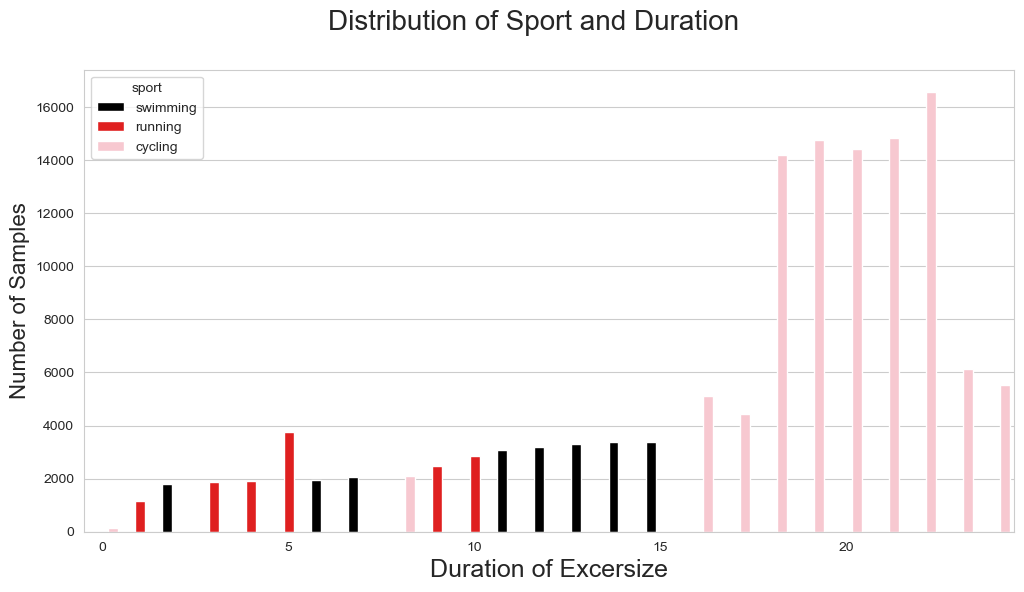

In [291]:
plt.figure(figsize=(12, 6))
plt.suptitle("Distribution of Sport and Duration", fontsize=20)
plt.xlabel("Duration", fontsize=18)
plt.ylabel("Number of Samples", fontsize=16)

ax = sns.countplot(x="duration", hue="sport", data=fit_df, palette=["black", "red", "pink", "orange", "lightgreen"])
ax.set(xlabel="Duration of Excersize", ylabel="Number of Samples")

# Customize the x-axis tick labels
num_ticks = 5
xticks = plt.xticks()[0]
xlabels = [int(x) for x in xticks]
skip = len(xlabels) // num_ticks

plt.xticks(xticks[::skip], xlabels[::skip])

plt.show()

In [174]:
tcx_df.head(20)

,Activity ID,latitude,longitude,elevation,heartrate,cadence,distance,speed,power,lap,session,timestamp
0,10608368604,28.987288,-13.510075,25.400000,82.0,0.0,0.000000,3.098,0.0,0,0,2023-03-01 11:06:46+00:00
1,10608368604,28.987312,-13.510056,25.400000,82.0,0.0,3.620000,3.406,0.0,0,0,2023-03-01 11:06:47+00:00
2,10608368604,28.987367,-13.509997,25.400000,82.0,NaN,11.650000,2.491,NaN,0,0,2023-03-01 11:06:50+00:00
3,10608368604,28.987393,-13.509988,25.200001,82.0,NaN,14.290000,2.538,NaN,0,0,2023-03-01 11:06:51+00:00
4,10608368604,28.987464,-13.510004,24.400000,82.0,NaN,21.980000,2.510,NaN,0,0,2023-03-01 11:06:54+00:00
5,10608368604,28.987551,-13.510031,25.200001,78.0,NaN,32.470001,2.351,NaN,0,0,2023-03-01 11:06:58+00:00
6,10608368604,28.987583,-13.510033,25.200001,77.0,NaN,35.799999,3.191,NaN,0,0,2023-03-01 11:06:59+00:00
7,10608368604,28.987611,-13.510014,25.000000,78.0,NaN,39.360001,3.555,NaN,0,0,2023-03-01 11:07:00+00:00
8,10608368604,28.987639,-13.509983,24.600000,78.0,NaN,43.669998,4.236,0.0,0,0,2023-03-01 11:07:01+00:00
9,10608368604,28.987671,-13.509958,24.200001,82.0,NaN,48.180000,4.329,0.0,0,0,2023-03-01 11:07:02+00:00


In [175]:
tcx_df.columns

Index(['Activity ID', 'latitude', 'longitude', 'elevation', 'heartrate',
       'cadence', 'distance', 'speed', 'power', 'lap', 'session', 'timestamp'],
      dtype='object')

In [176]:
tcx_df.describe()

,latitude,longitude,elevation,heartrate,cadence,distance,speed,power,lap,session
count,114803.000000,114803.000000,114803.000000,134895.000000,81730.000000,114803.000000,114803.000000,95879.000000,134903.000000,134903.0
mean,29.044371,-13.566386,146.243063,119.045013,72.154411,44682.367533,7.149183,220.047654,9.684766,0.0
std,0.073690,0.109078,124.562707,14.874440,23.088035,35777.512149,3.458939,102.174802,7.968517,0.0
min,28.865344,-13.834951,2.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,28.992805,-13.631391,29.200001,111.000000,70.000000,10491.850098,4.199000,174.000000,3.000000,0.0
50%,29.024752,-13.513744,120.800003,122.000000,77.000000,37216.988281,6.587000,226.000000,8.000000,0.0
75%,29.095728,-13.494657,246.399994,129.000000,85.000000,72855.195312,9.312000,278.000000,15.000000,0.0
max,29.219449,-13.422027,590.000000,156.000000,137.000000,131387.218750,20.929001,671.000000,51.000000,0.0


In [177]:
gpx_df.head(20)

,Activity ID,latitude,longitude,elevation,heartrate,timestamp,cadence
0,10635316266,28.988068,-13.510594,33.400002,71.0,2023-03-05 11:14:10+00:00,NaN
1,10635316266,28.988068,-13.510539,33.400002,71.0,2023-03-05 11:14:11+00:00,NaN
2,10635316266,28.988052,-13.510366,33.599998,75.0,2023-03-05 11:14:16+00:00,NaN
3,10635316266,28.987927,-13.510197,33.599998,74.0,2023-03-05 11:14:22+00:00,NaN
4,10635316266,28.987807,-13.509983,34.000000,74.0,2023-03-05 11:14:28+00:00,NaN
5,10635316266,28.987802,-13.509934,33.400002,74.0,2023-03-05 11:14:29+00:00,NaN
6,10635316266,28.987808,-13.509888,31.799999,73.0,2023-03-05 11:14:30+00:00,NaN
7,10635316266,28.987822,-13.509846,30.799999,69.0,2023-03-05 11:14:31+00:00,NaN
8,10635316266,28.987835,-13.509809,30.400000,68.0,2023-03-05 11:14:32+00:00,NaN
9,10635316266,28.987851,-13.509773,30.000000,67.0,2023-03-05 11:14:33+00:00,NaN


In [178]:
gpx_df.columns

Index(['Activity ID', 'latitude', 'longitude', 'elevation', 'heartrate',
       'timestamp', 'cadence'],
      dtype='object')

In [103]:
gpx_df.describe()

,latitude,longitude,elevation,heartrate,cadence
count,114803.000000,114803.000000,114803.000000,114795.000000,95714.000000
mean,29.044371,-13.566386,146.243063,120.374250,74.104300
std,0.073690,0.109078,124.562707,14.652962,21.859002
min,28.865344,-13.834951,2.000000,59.000000,0.000000
25%,28.992805,-13.631391,29.200001,113.000000,71.000000
50%,29.024752,-13.513744,120.800003,123.000000,80.000000
75%,29.095728,-13.494657,246.399994,130.000000,86.000000
max,29.219449,-13.422027,590.000000,156.000000,137.000000


#### Determine unique columns for each dataframe

In [179]:
# Setting columns
df1_columns = set(fit_df.columns)
df2_columns = set(tcx_df.columns)
df3_columns = set(gpx_df.columns)

# Determine common columns among all dataframes
common_columns = df1_columns.intersection(df2_columns, df3_columns)

# Determine columns specific to each dataframe
df1_unique_columns = df1_columns.difference(df2_columns, df3_columns)
df2_unique_columns = df2_columns.difference(df1_columns, df3_columns)
df3_unique_columns = df3_columns.difference(df1_columns, df2_columns)

# Print the results
print("Common Columns:")
print(common_columns)
print()
print("Columns in fit only:")
print(df1_unique_columns)
print()
print("Columns in tcx only:")
print(df2_unique_columns)
print()
print("Columns in gpx only:")
print(df3_unique_columns)

Common Columns:
{'Activity ID', 'latitude', 'heartrate', 'timestamp', 'cadence', 'longitude'}

Columns in fit only:
{'stance_time', 'sport', 'temperature', 'unknown_134', 'unknown_137', 'enhanced_altitude', 'unknown_136', 'unknown_107', 'activity_type', 'unknown_87', 'stance_time_percent', 'unknown_138', 'vertical_oscillation', 'vertical_ratio', 'enhanced_speed', 'unknown_108', 'unknown_140', 'record_sequence', 'fractional_cadence', 'unknown_90', 'unknown_135', 'step_length', 'stance_time_balance', 'accumulated_power'}

Columns in tcx only:
{'speed'}

Columns in gpx only:
set()


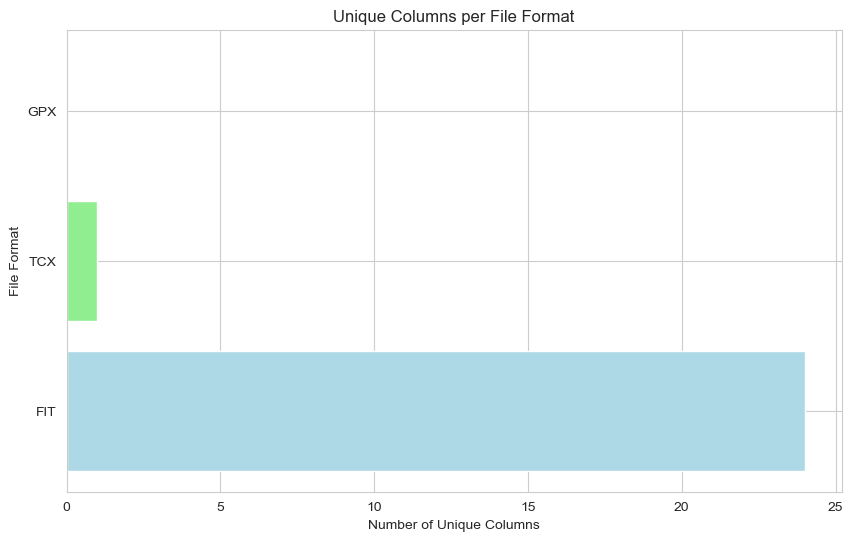

In [180]:
# Visualize the column names
unique_counts = [len(df1_unique_columns), len(df2_unique_columns), len(df3_unique_columns)]
formats = ['FIT', 'TCX', 'GPX']
colors = ['lightblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(10, 6))
plt.barh(formats, unique_counts, color=colors)
plt.xlabel('Number of Unique Columns')
plt.ylabel('File Format')
plt.title('Unique Columns per File Format')
plt.show()

### Shape Comparison
Can the datasets be compared or even exchanged with one another

In [240]:
# Compare the shape of the data frames
if gpx_df.shape == tcx_df.shape == fit_df.shape:
    print("The data frames have the same shape: {}".format(gpx_df.shape))
else:
    print("The data frames have different shapes:")
    print("GPX shape: {}".format(gpx_df.shape))
    print("TCX shape: {}".format(tcx_df.shape))
    print("FIT shape: {}".format(fit_df.shape))

The data frames have different shapes:
GPX shape: (114803, 7)
TCX shape: (134903, 12)
FIT shape: (134335, 34)


In [239]:
# Get the unique activity IDs across all data frames
activity_ids = set(gpx_df['Activity ID']).union(set(tcx_df['Activity ID']), set(fit_df['Activity ID']))

# Compare the shapes and print the shapes for each activity ID
for activity_id in activity_ids:
    gpx_shape = gpx_df[gpx_df['Activity ID'] == activity_id].shape
    tcx_shape = tcx_df[tcx_df['Activity ID'] == activity_id].shape
    fit_shape = fit_df[fit_df['Activity ID'] == activity_id].shape

    print(f"Activity ID: {activity_id}")
    print("GPX shape: {}".format(gpx_shape))
    print("TCX shape: {}".format(tcx_shape))
    print("FIT shape: {}".format(fit_shape))
    print("------------------")

Activity ID: 10660661255
GPX shape: (1140, 7)
TCX shape: (1140, 12)
FIT shape: (1140, 34)
------------------
Activity ID: 10639387795
GPX shape: (1902, 7)
TCX shape: (1902, 12)
FIT shape: (1902, 34)
------------------
Activity ID: 10635316266
GPX shape: (4430, 7)
TCX shape: (4430, 12)
FIT shape: (4430, 34)
------------------
Activity ID: 10579366115
GPX shape: (2458, 7)
TCX shape: (2458, 12)
FIT shape: (2458, 34)
------------------
Activity ID: 10655142510
GPX shape: (6129, 7)
TCX shape: (6129, 12)
FIT shape: (6129, 34)
------------------
Activity ID: 10592753796
GPX shape: (1863, 7)
TCX shape: (1863, 12)
FIT shape: (1863, 34)
------------------
Activity ID: 10659137799
GPX shape: (0, 7)
TCX shape: (0, 12)
FIT shape: (2061, 34)
------------------
Activity ID: 10606052292
GPX shape: (1913, 7)
TCX shape: (1913, 12)
FIT shape: (1913, 34)
------------------
Activity ID: 10612828555
GPX shape: (0, 7)
TCX shape: (3305, 12)
FIT shape: (3305, 34)
------------------
Activity ID: 10640071352
GPX

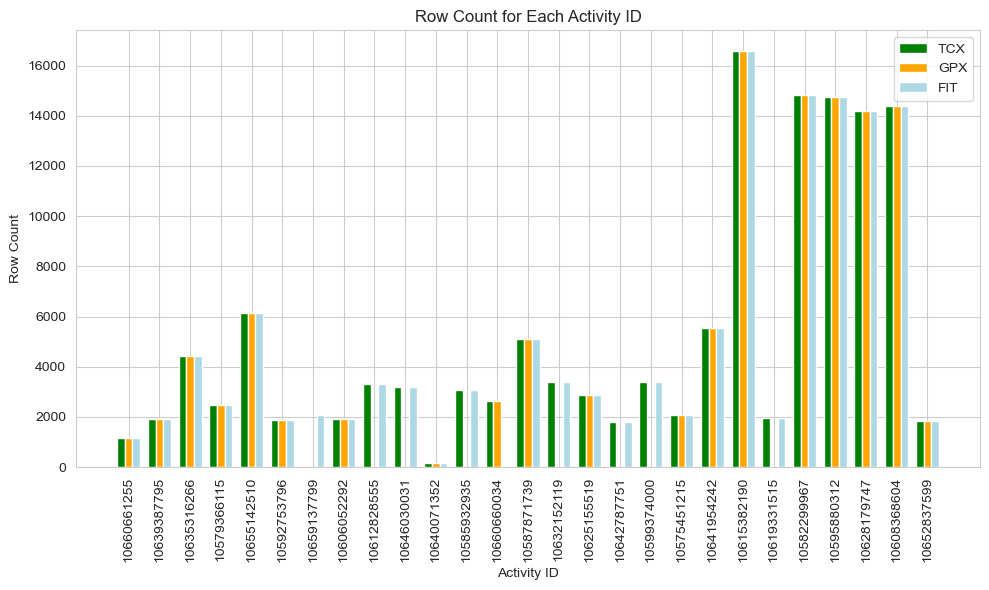

In [246]:
# Get the unique activity IDs
unique_ids = set(tcx_df['Activity ID']).union(set(gpx_df['Activity ID'])).union(set(fit_df['Activity ID']))

# Initialize the row counts for each activity ID
tcx_row_counts = []
gpx_row_counts = []
fit_row_counts = []

# Count the rows for each activity ID in the TCX dataframe
for activity_id in unique_ids:
    tcx_row_count = tcx_df[tcx_df['Activity ID'] == activity_id].shape[0]
    tcx_row_counts.append(tcx_row_count)

# Count the rows for each activity ID in the GPX dataframe
for activity_id in unique_ids:
    gpx_row_count = gpx_df[gpx_df['Activity ID'] == activity_id].shape[0]
    gpx_row_counts.append(gpx_row_count)

# Count the rows for each activity ID in the FIT dataframe
for activity_id in unique_ids:
    fit_row_count = fit_df[fit_df['Activity ID'] == activity_id].shape[0]
    fit_row_counts.append(fit_row_count)

# Set the positions for the bars
bar_width = 0.25
r1 = np.arange(len(unique_ids))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the grouped bar graph
plt.figure(figsize=(10, 6))
plt.bar(r1, tcx_row_counts, color='green', width=bar_width, label='TCX')
plt.bar(r2, gpx_row_counts, color='orange', width=bar_width, label='GPX')
plt.bar(r3, fit_row_counts, color='lightblue', width=bar_width, label='FIT')

# Add labels, title, and legend
plt.xlabel('Activity ID')
plt.ylabel('Row Count')
plt.title('Row Count for Each Activity ID')
plt.xticks([r + bar_width for r in range(len(unique_ids))], unique_ids, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

We see the different available data for the different dataframes, so it's hard to make an overall decision. So in answer of our primary question, it depends on the dataset.

### Missing Values

Visualizing missing data in our EDA for fitness data can is used to understand the completeness and patterns of missingness within the dataset. For us it is important to visualize the data which is missing so we can identify variables with high missing values or observe if certain data points or records have a significant amount of missing data.
This assessment helps us in understanding the overall data quality and the potential impact of missing values on subsequent analyses.
Through Visualizing missing data we can also reveal patterns or correlations in the missingness. We might observe if missingness occurs systematically, such as in our case the lack of temperature data. Identifying these patterns can provide us insights into the underlying causes of missingness, such as data collection issues, data entry errors, or missingness dependent on other variables.
Lastly its important for our Missing Data Handling. Is the data needed or can we also use deletion, imputation, or incorporating the data. Visualizations can help us evaluate the potential impact of different missing data handling techniques on subsequent analyses or models.


In [98]:
# Missing values analysis
missing_values = fit_df.isnull().sum()
missing_values

Activity ID                  0
heartrate                    5
temperature             134335
unknown_135             110084
unknown_136             110084
sport                        0
record_sequence              0
session                      0
lap                          0
latitude                 22161
longitude                22161
distance                 22161
accumulated_power        38414
enhanced_speed           22161
enhanced_altitude        22161
unknown_140              22161
power                    38456
vertical_oscillation    120351
stance_time_percent     120359
stance_time             120359
vertical_ratio          120351
stance_time_balance     120359
step_length             120351
unknown_87               38621
cadence                  38621
activity_type           120351
fractional_cadence       38621
unknown_107              22161
unknown_134              35006
unknown_137              22166
unknown_138              22166
unknown_108              29725
unknown_

<AxesSubplot:>

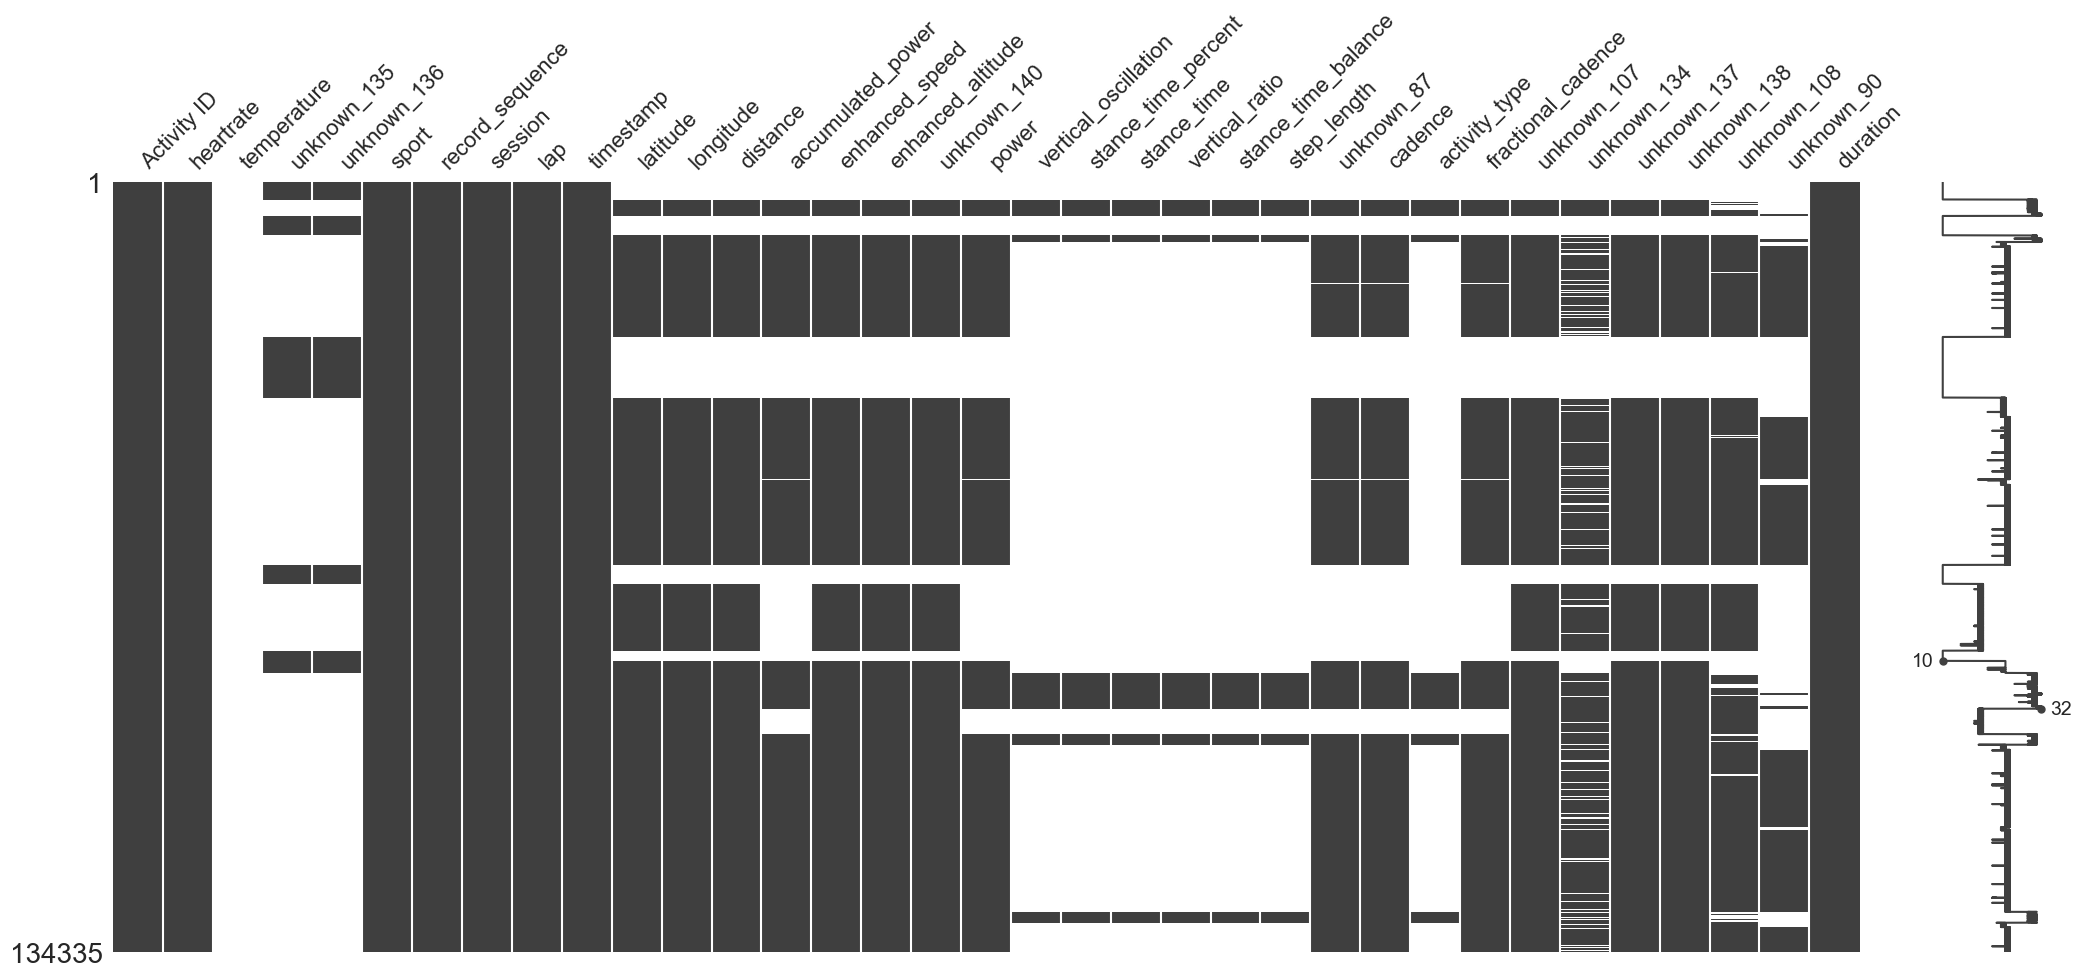

In [293]:
msno.matrix(fit_df)

In [118]:
# Missing values analysis
missing_values = tcx_df.isnull().sum()
missing_values

Activity ID        0
latitude       20100
longitude      20100
elevation      20100
heartrate          8
cadence        53173
distance       20100
speed          20100
power          39024
lap                0
session            0
dtype: int64

<AxesSubplot:>

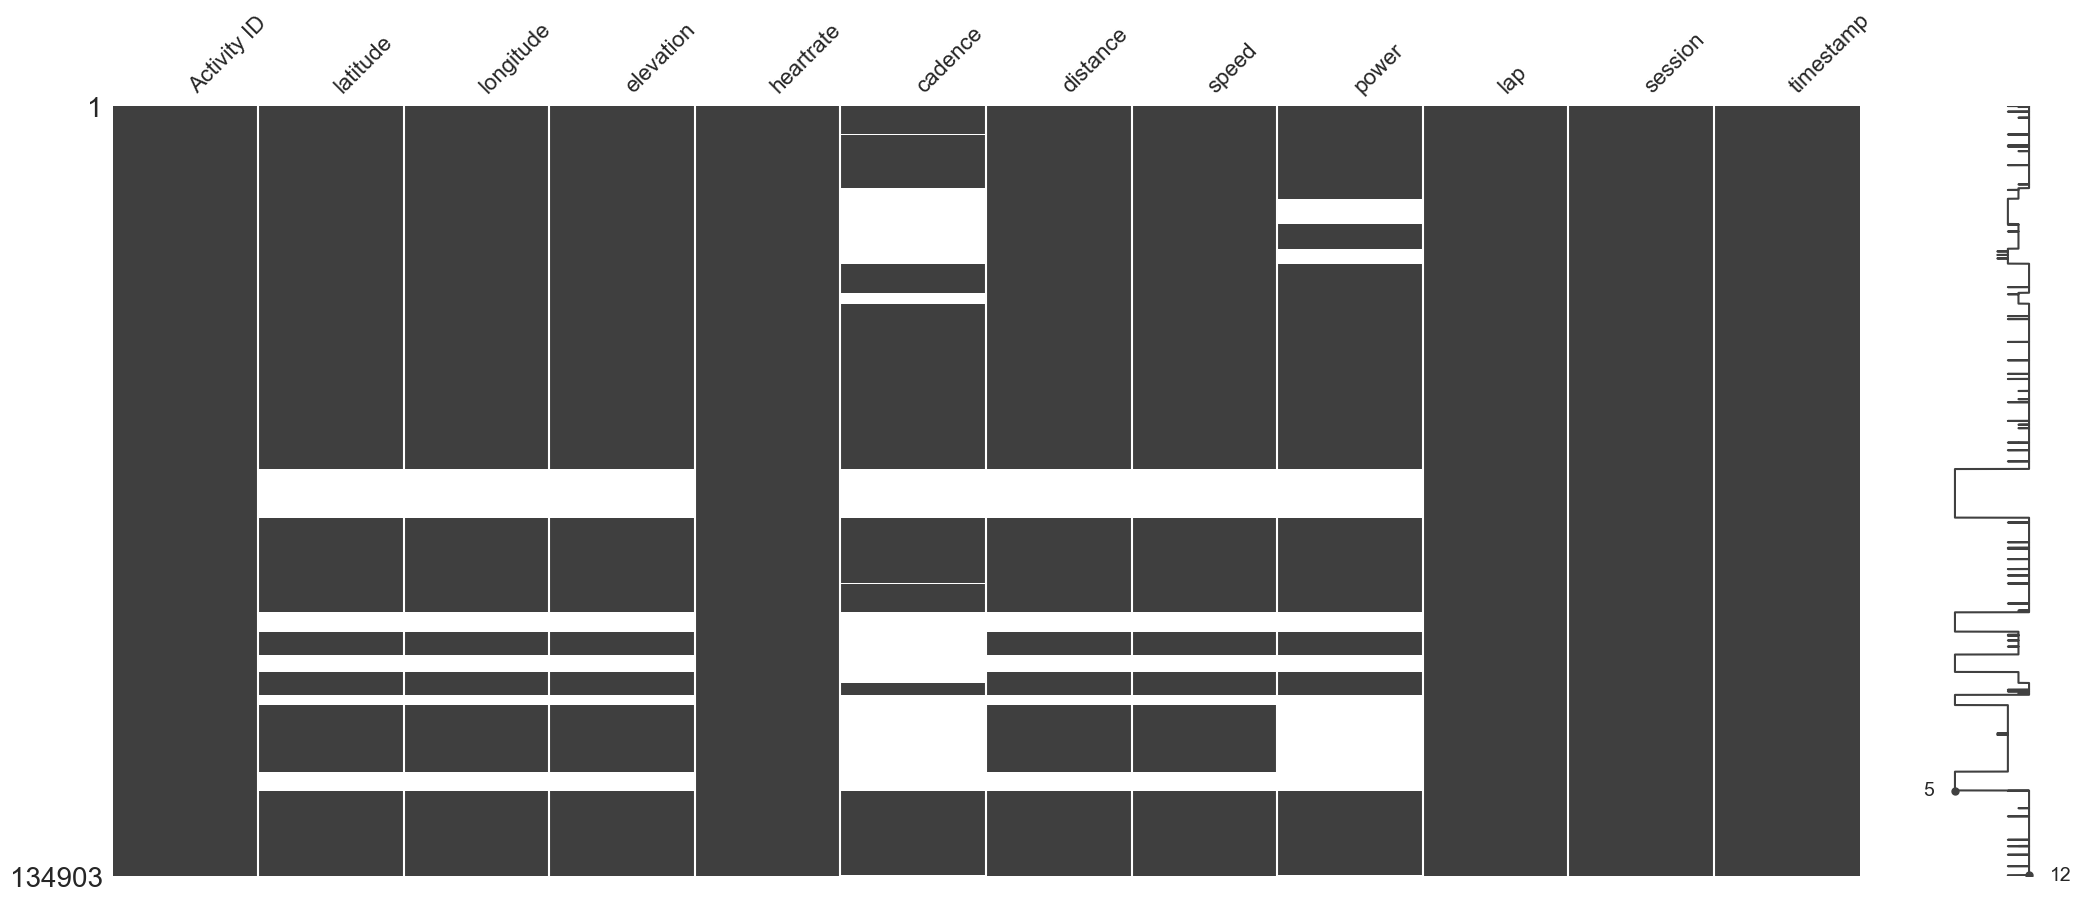

In [294]:
msno.matrix(tcx_df)

In [121]:
# Missing values analysis
missing_values = gpx_df.isnull().sum()
missing_values

Activity ID        0
latitude           0
longitude          0
elevation          0
heartrate          8
cadence        19089
dtype: int64

<AxesSubplot:>

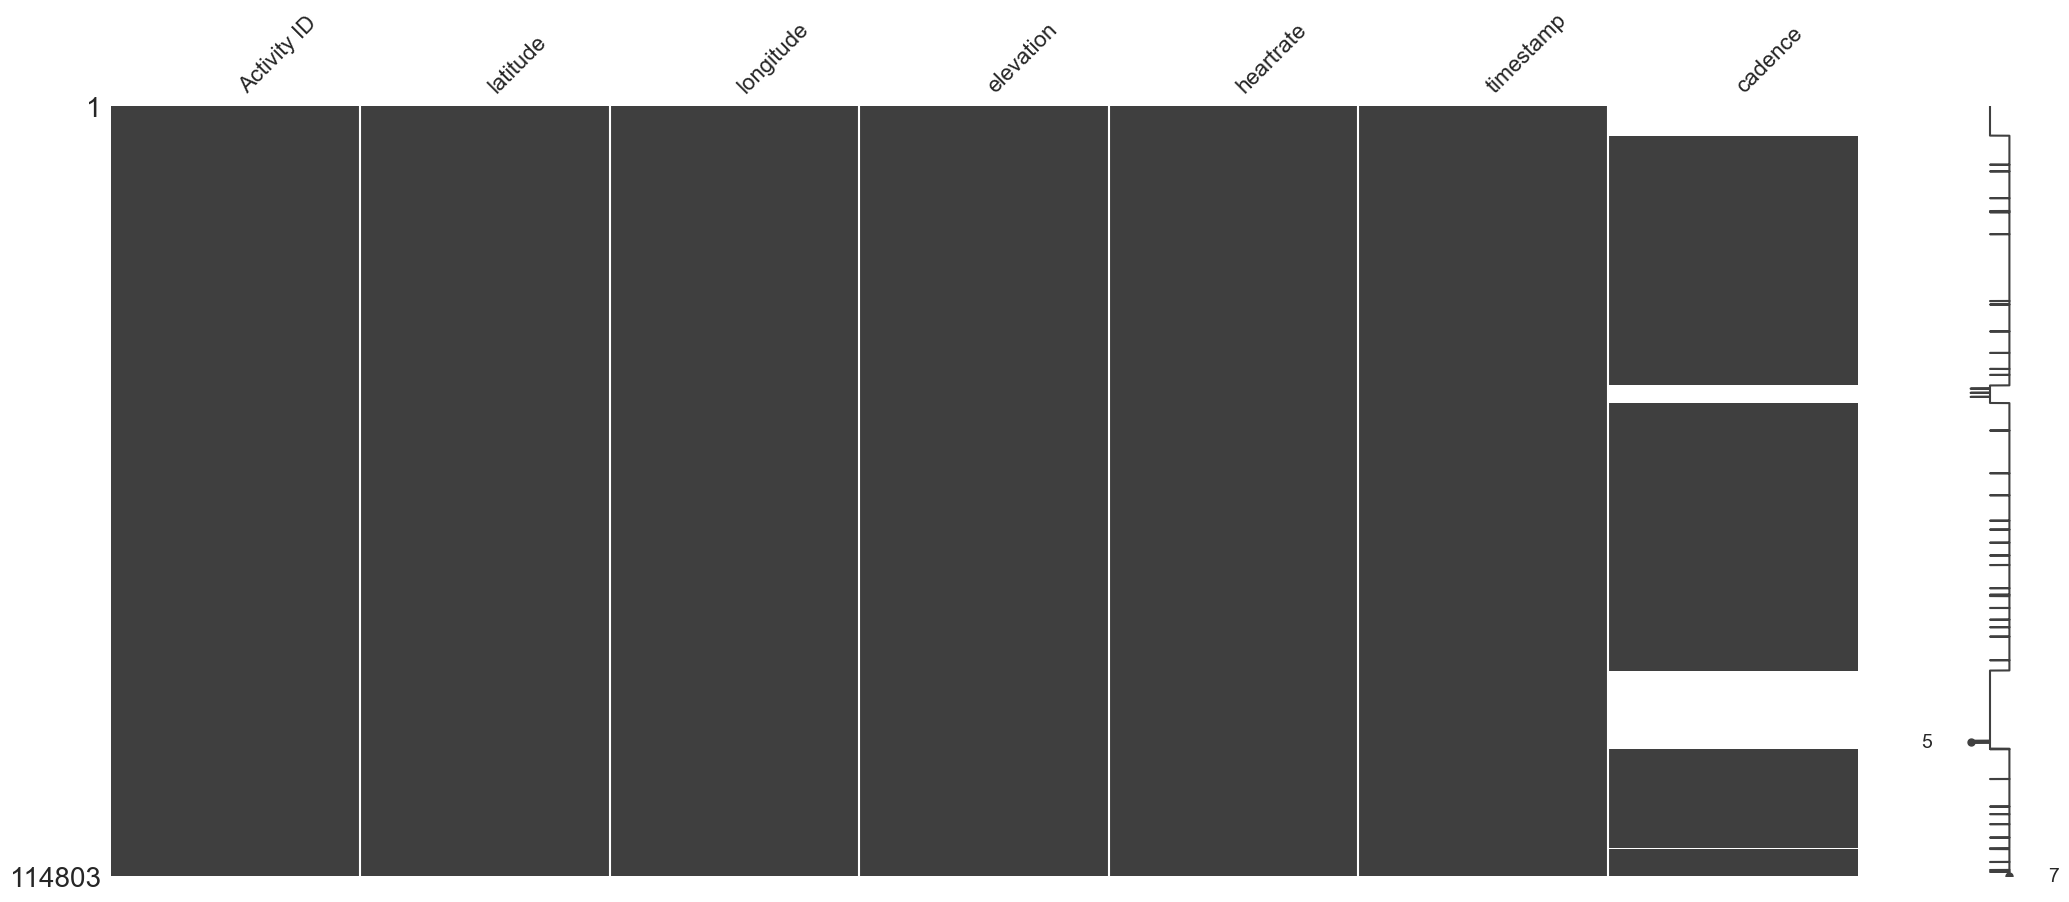

In [295]:
msno.matrix(gpx_df)

### Value distribution

Through comparison of the values and the distribution of our fitness data we can gain further insights into our fitness data. It helps us for the future feature compatibility. For instance Different file formats may have variations in the supported features or data representation. By comparing the features, we can identify commonalities and differences, enabling us to determine which features are consistently available across file formats and which are specific to certain file types like gpx, tcx and fit.

Regarding our data exploration, visualizing the distributions of different features across file formats allows us for a deeper understanding of the data. It helps us identify patterns, trends, outliers, and potential relationships between variables. Through this use we can gain a good look at the data and compare the different file types which have been provided.

(source: "Python for Data Analysis" - Wes McKinney)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


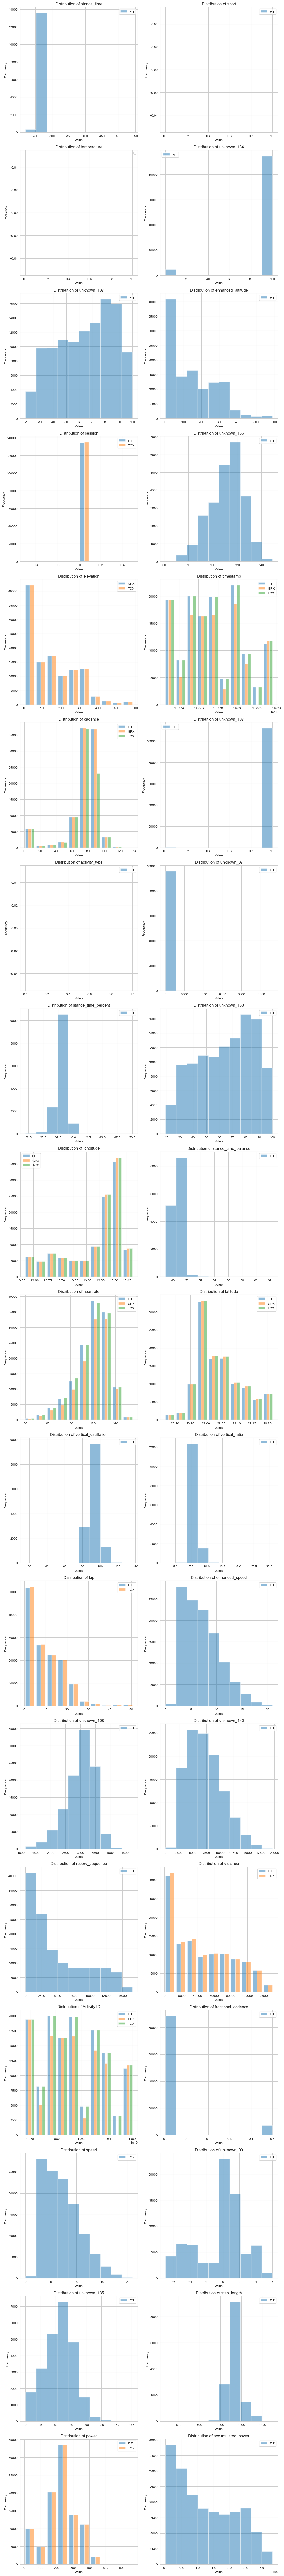

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

data_frames = [fit_df, gpx_df, tcx_df]
data_labels = ['FIT', 'GPX', 'TCX']

# Get the union of all column names across data frames
all_columns = set().union(*[set(df.columns) for df in data_frames])

num_features = len(all_columns)
num_rows = num_features // 2 + num_features % 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

for idx, column_name in enumerate(all_columns):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    data_values = []
    labels = []

    for df, label in zip(data_frames, data_labels):
        if column_name in df.columns and not df[column_name].isnull().all():
            values = pd.to_numeric(df[column_name], errors='coerce')
            values = values.dropna()
            data_values.append(values)
            labels.append(label)

    ax.hist(data_values, bins=10, alpha=0.5, label=labels)
    ax.set_title(f'Distribution of {column_name}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

# Remove empty subplots
if num_features % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

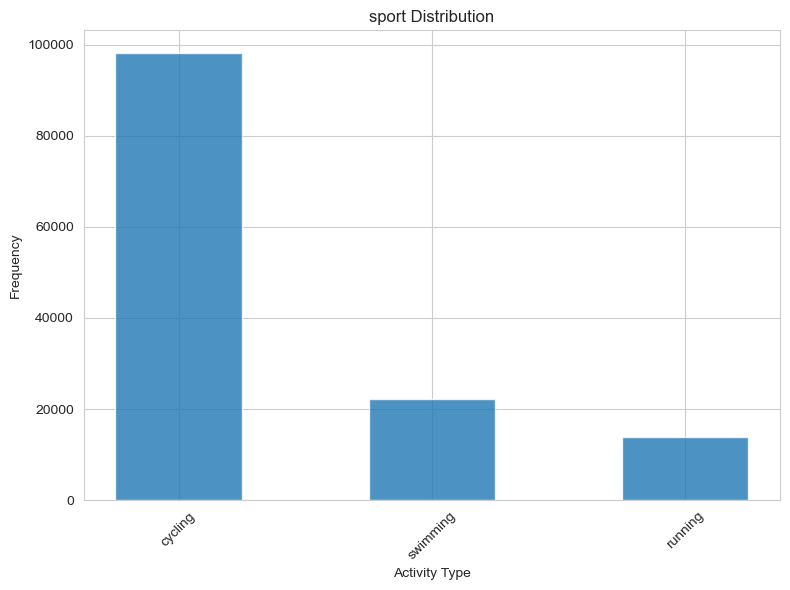

In [213]:
import matplotlib.pyplot as plt

# Specify the data frame and the feature for the grouped bar graph
data_frame = fit_df
feature_name = 'sport'

# Get the frequency counts of the feature
counts = data_frame[feature_name].value_counts()

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.5
opacity = 0.8

# Plot the grouped bar graph
ax.bar(counts.index, counts.values, bar_width, alpha=opacity)

ax.set_xlabel('Sport')
ax.set_ylabel('Frequency')
ax.set_title(f'{feature_name} Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

We realize that through time series data, longer entries are weighted heavier than the others, to show the correct count of each unique entry, we decided to count the combination of Activity ID and Sport.

#### Str distributions

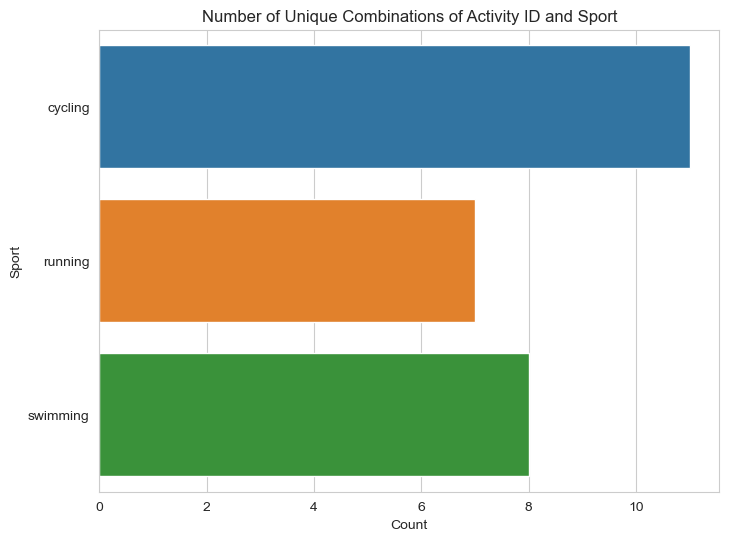

In [312]:
unique_combinations = fit_df.groupby(['Activity ID', 'sport']).size().reset_index().groupby('sport').nunique().reset_index()
unique_combinations = unique_combinations[['sport', 'Activity ID']]
unique_combinations.columns = ['Sport', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='Count', y='Sport', data=unique_combinations)
plt.title('Number of Unique Combinations of Activity ID and Sport')
plt.xlabel('Count')
plt.ylabel('Sport')
plt.show()

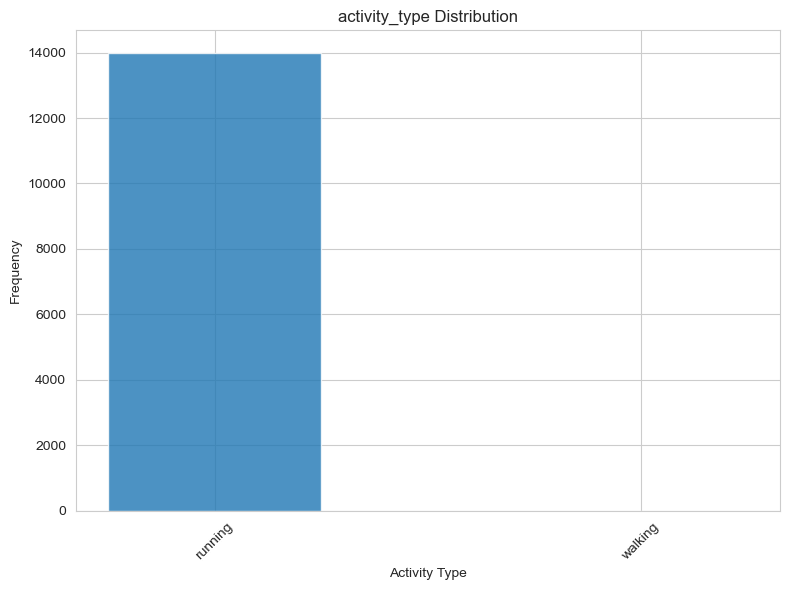

In [214]:
# Specify the data frame and the feature for the grouped bar graph
data_frame = fit_df
feature_name = 'activity_type'

# Get the frequency counts of the feature
counts = data_frame[feature_name].value_counts()

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.5
opacity = 0.8

# Plot the grouped bar graph
ax.bar(counts.index, counts.values, bar_width, alpha=opacity)

ax.set_xlabel('Activity Type')
ax.set_ylabel('Frequency')
ax.set_title(f'{feature_name} Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [313]:
activity_type_counts = fit_df['activity_type'].value_counts()
print(activity_type_counts)

running    13976
walking        8
Name: activity_type, dtype: int64


### Correlation Matrix

We use the correlation matrix to

Identify patterns: A correlation matrix helps us to identify patterns and dependencies between variables. It can reveal which variables are positively or negatively correlated, indicating whether they tend to increase or decrease together.
Feature selection: Correlation analysis can aid us in feature selection by identifying highly correlated variables. Redundant or highly correlated variables can be removed to reduce dimensionality and improve model performance.
Understand relationships: By examining the correlation coefficients, we can gain a better understanding of how variables relate to each other. Strong positive or negative correlations indicate a significant relationship, while weak correlations suggest less dependence.

Additionally, for the unknown features of the fit model it might help us to understand those features better or even reverse engineer some of them.

(source:  "Introduction to Linear Regression Analysis" - Douglas C. Montgomery, Elizabeth A. Peck, and G. Geoffrey Vining)

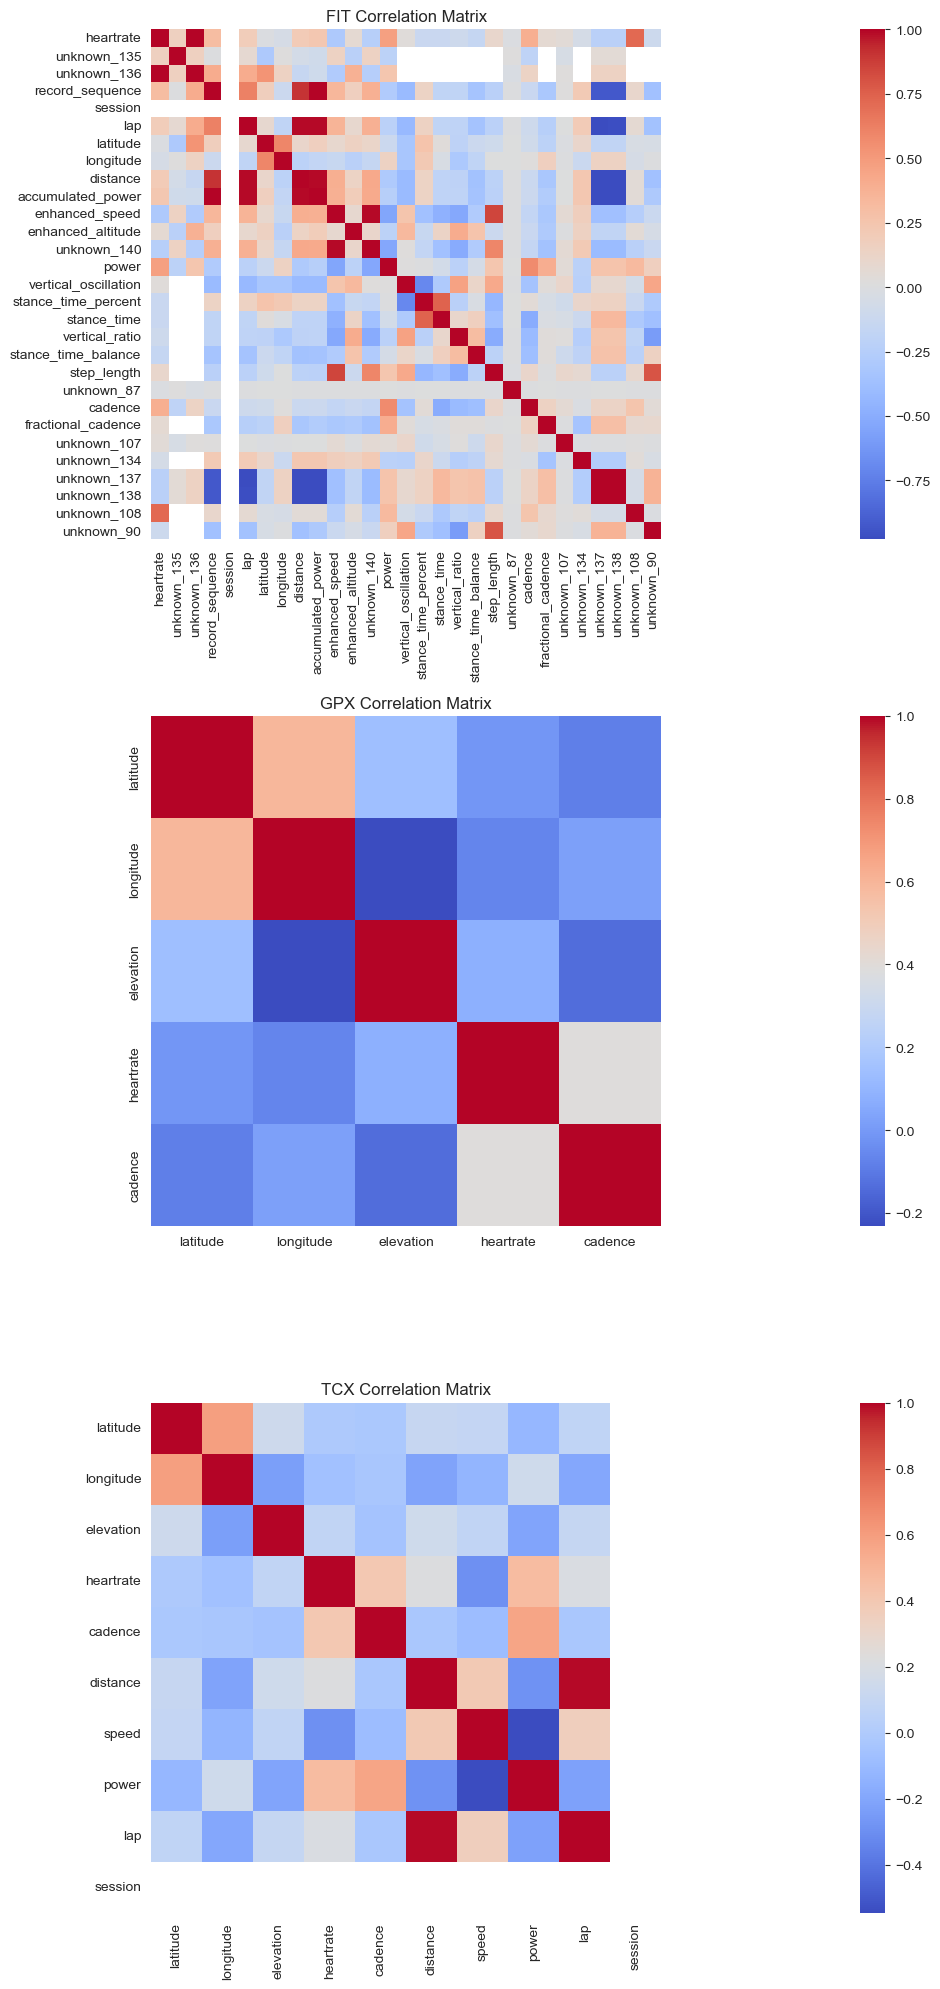

In [261]:
# Create correlation matrices for each data type
fit_corr = fit_df.corr()
gpx_corr = gpx_df.corr()
tcx_corr = tcx_df.corr()

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(40, 20))

# Plot correlation matrix for FIT data
sns.heatmap(fit_corr, cmap='coolwarm', annot=False, ax=axes[0], square=True)
axes[0].set_title('FIT Correlation Matrix')

# Plot correlation matrix for GPX data
sns.heatmap(gpx_corr, cmap='coolwarm', annot=False, ax=axes[1], square=True)
axes[1].set_title('GPX Correlation Matrix')

# Plot correlation matrix for TCX data
sns.heatmap(tcx_corr, cmap='coolwarm', annot=False, ax=axes[2], square=True)
axes[2].set_title('TCX Correlation Matrix')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Outlier Detection
To avoid Outliers and data points that deviate significantly from the majority of the data and may indicate unusual or erroneous observations we decide to identify them by using the z-score for each of the dataframes. By identifying and handling outliers, we can gain insights into data quality, improve analysis and modeling, and prevent potential biases or errors.

To effectively detect outliers in our fitness data, we decided to combine multiple techniques, considering the data's nature we decided to use the z-score and boxplot methods.

By utilizing the z-score method and the box plot visualization together, we can gain a comprehensive understanding of outlier patterns in our fitness data. The z-score method provides a quantitative measure of outliers, while the box plot visualization offers a visual representation of the data distribution and highlights potential outliers for further investigation. This combination of methods helps in effectively identifying and analyzing outliers in fitness data.

### Outlier detection - Heartrate and Cadence for FIT, TCX and GPX

We decided to exclude features like longitude etc. since location-based features like longitude and latitude may not be relevant for outlier detection in the context of fitness data analysis.
These features primarily represent the geographical coordinates of the activity, which may not directly contribute to identifying outliers in other data attributes such as heart rate, distance, or time.
Other excluded features like activity ID, which serve as unique identifiers for each activity, are not suitable for outlier detection since they are meant for identification purposes only and not for analysis or comparison.

(sources: https://medium.com/swlh/how-do-ai-based-fitness-trackers-work-ft-1d-cnns-e76f679bdee8 ;
https://towardsdatascience.com/parsing-fitness-tracker-data-with-python-a59e7dc17418)

### Heartrate and Cadence
for all 3 dataframes

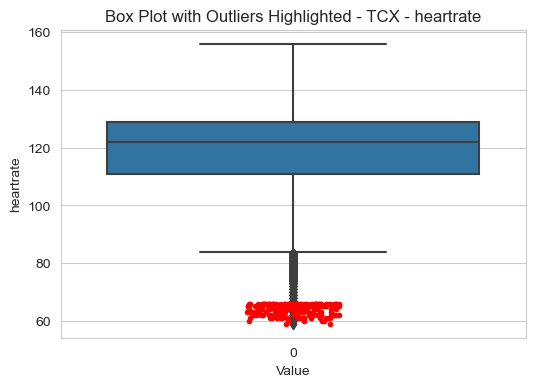

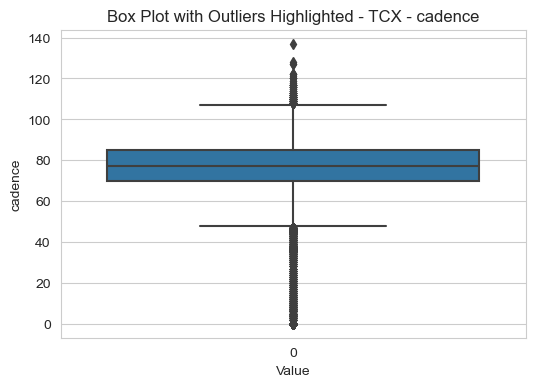

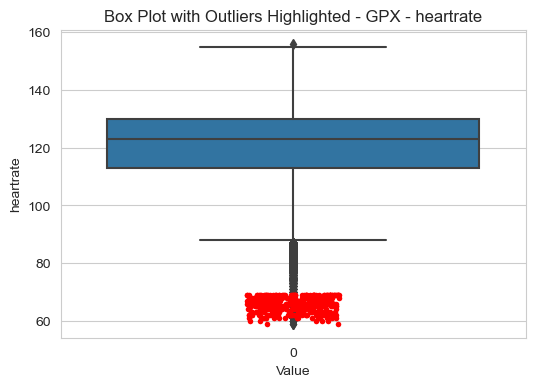

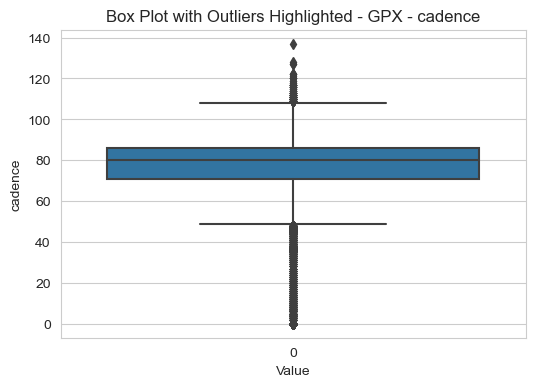

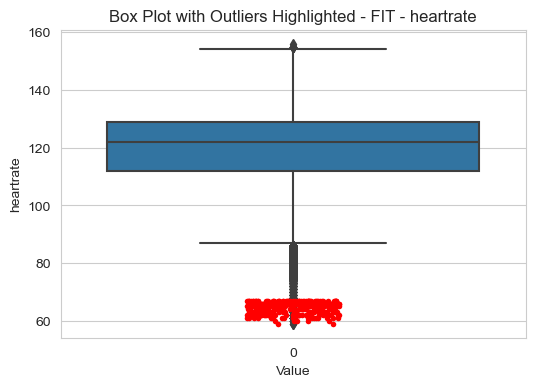

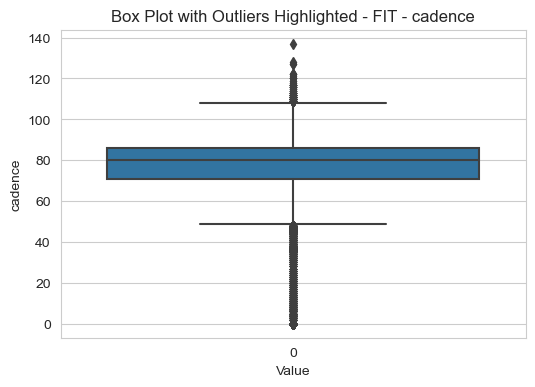

In [273]:
# Define the z-score threshold
z_score_threshold = 3.5

# Function to detect outliers using z-score
def detect_outliers_zscore(data):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = data[z_scores > z_score_threshold]
    return outliers

# Define the dataframes: tcx_df, gpx_df, fit_df

# Create a list of dataframes
data_frames = [tcx_df, gpx_df, fit_df]
data_labels = ['TCX', 'GPX', 'FIT']

# Iterate over the dataframes
for df, label in zip(data_frames, data_labels):
    # Select the columns for outlier detection
    columns = ['heartrate', 'cadence']

    # Create a new dataframe for outliers
    outliers_df = pd.DataFrame()

    # Detect outliers and create separate box plots for each feature
    for column in columns:
        outliers = detect_outliers_zscore(df[column])
        outliers_df[column] = outliers

        # Create a separate box plot for the current feature
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df[column])
        sns.stripplot(data=outliers, color='red', marker='o', size=4)
        plt.title(f'Box Plot with Outliers Highlighted - {label} - {column}')
        plt.xlabel('Value')
        plt.ylabel(column)
        plt.show()

### Other features
for tcx and fit

In [275]:
print(tcx_df.columns)
print(fit_df.columns)

Index(['Activity ID', 'latitude', 'longitude', 'elevation', 'heartrate',
       'cadence', 'distance', 'speed', 'power', 'lap', 'session', 'timestamp'],
      dtype='object')
Index(['Activity ID', 'heartrate', 'temperature', 'unknown_135', 'unknown_136',
       'sport', 'record_sequence', 'session', 'lap', 'timestamp', 'latitude',
       'longitude', 'distance', 'accumulated_power', 'enhanced_speed',
       'enhanced_altitude', 'unknown_140', 'power', 'vertical_oscillation',
       'stance_time_percent', 'stance_time', 'vertical_ratio',
       'stance_time_balance', 'step_length', 'unknown_87', 'cadence',
       'activity_type', 'fractional_cadence', 'unknown_107', 'unknown_134',
       'unknown_137', 'unknown_138', 'unknown_108', 'unknown_90'],
      dtype='object')


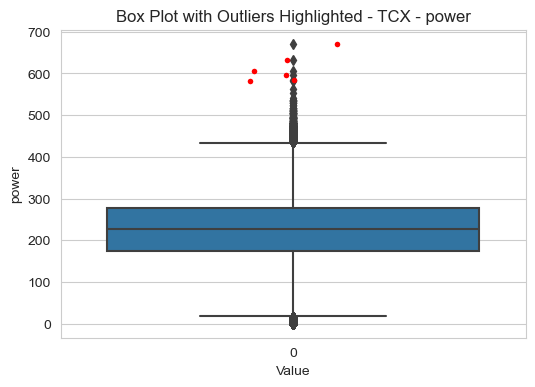

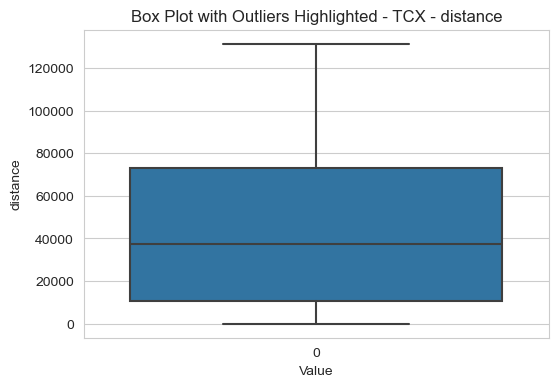

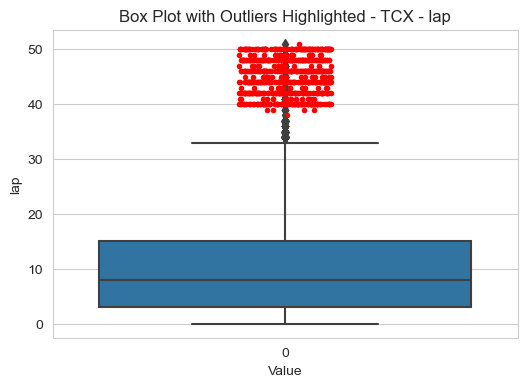

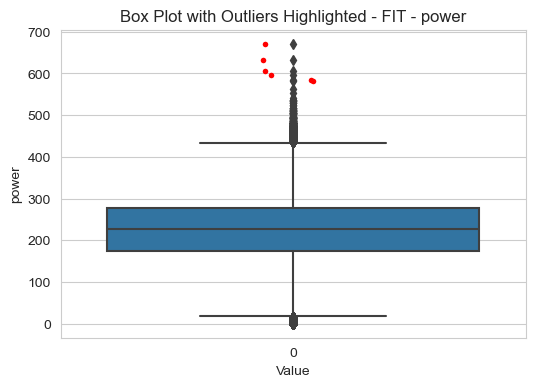

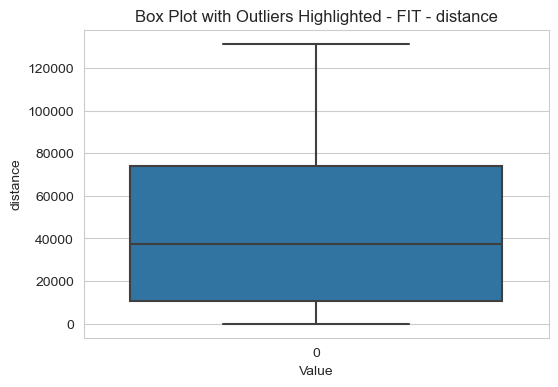

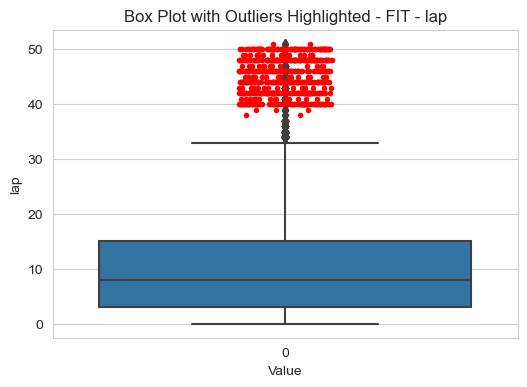

In [276]:
# Define the z-score threshold
z_score_threshold = 3.5

# Function to detect outliers using z-score
def detect_outliers_zscore(data):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = data[z_scores > z_score_threshold]
    return outliers

# Define the dataframes: tcx_df, gpx_df, fit_df

# Create a list of dataframes
data_frames = [tcx_df, fit_df]
data_labels = ['TCX', 'FIT']

# Iterate over the dataframes
for df, label in zip(data_frames, data_labels):
    # Select the columns for outlier detection
    columns = ['power', 'distance', 'lap']

    # Create a new dataframe for outliers
    outliers_df = pd.DataFrame()

    # Detect outliers and create separate box plots for each feature
    for column in columns:
        outliers = detect_outliers_zscore(df[column])
        outliers_df[column] = outliers

        # Create a separate box plot for the current feature
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df[column])
        sns.stripplot(data=outliers, color='red', marker='o', size=4)
        plt.title(f'Box Plot with Outliers Highlighted - {label} - {column}')
        plt.xlabel('Value')
        plt.ylabel(column)
        plt.show()

### FIT Distribution

We are looking at the Z-Score for the relevant features of the fit dataset:
Features like latitude and longitude have been excluded since they don't support the idea of outliers after our first look at the describe functions.

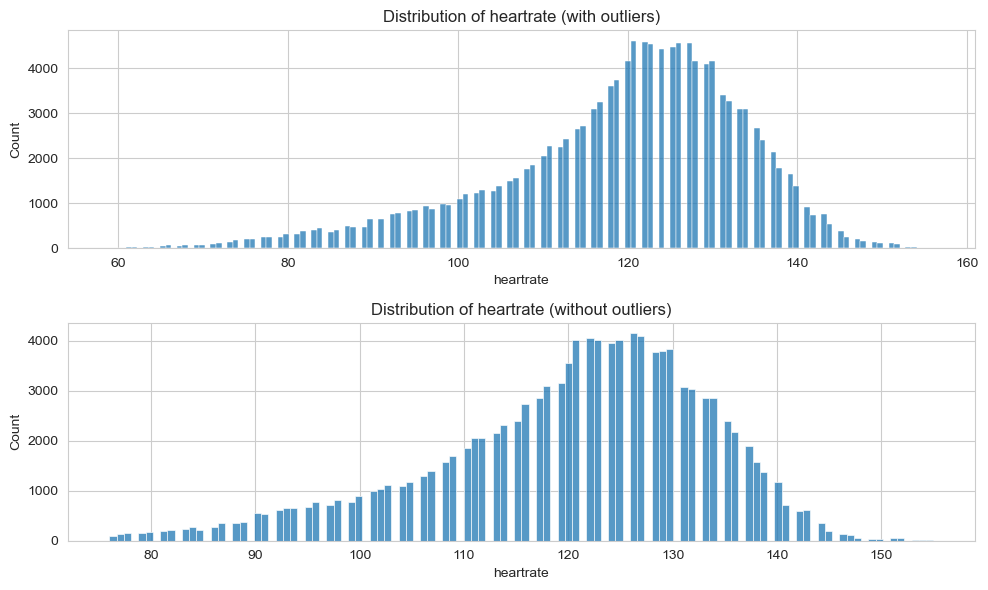

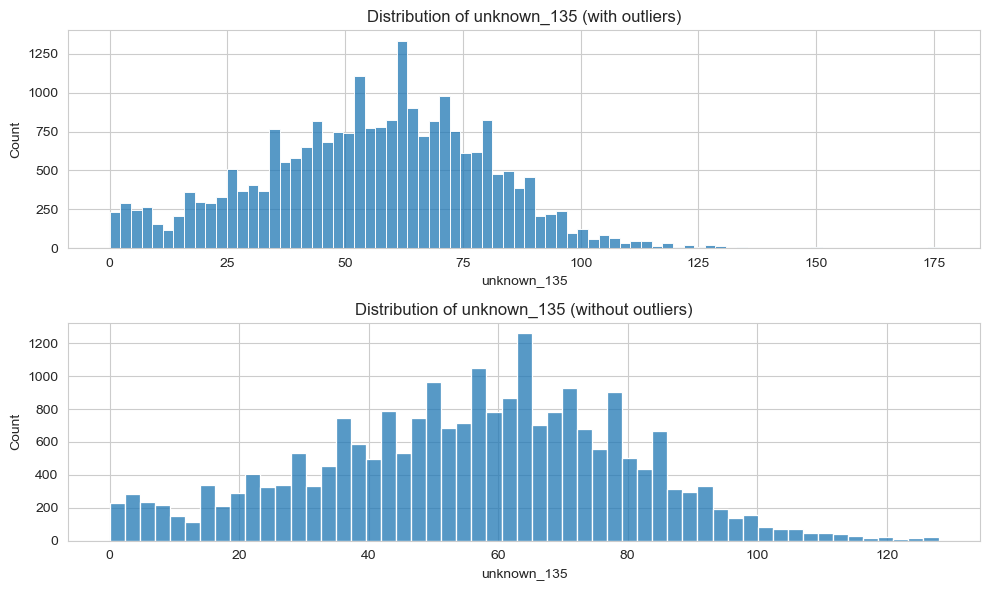

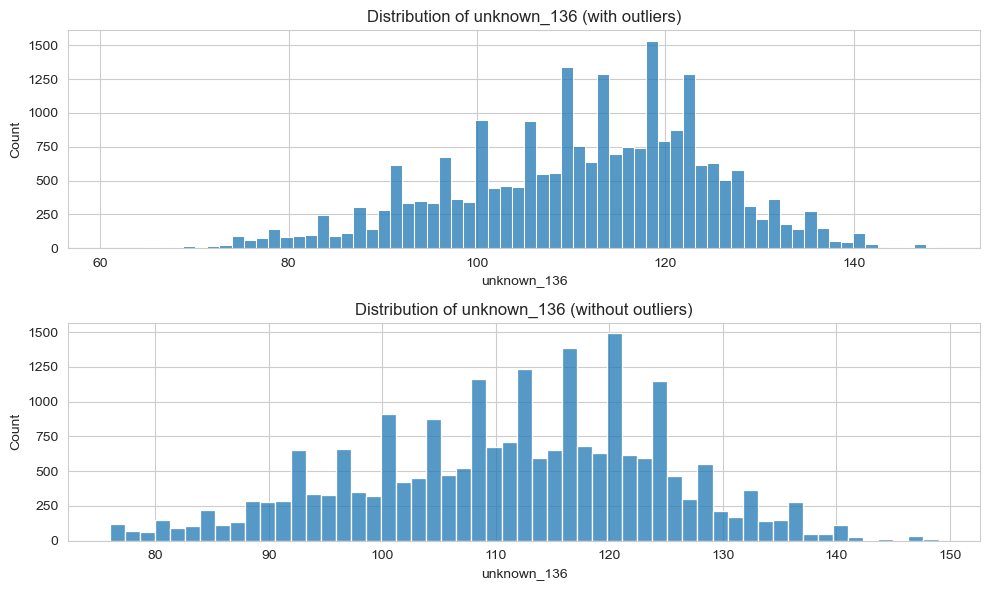

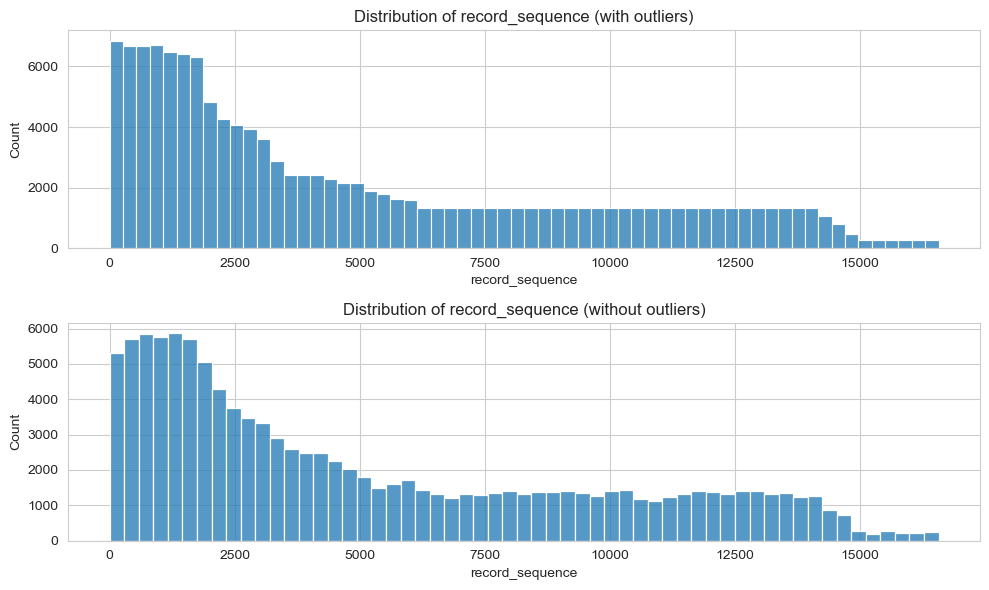

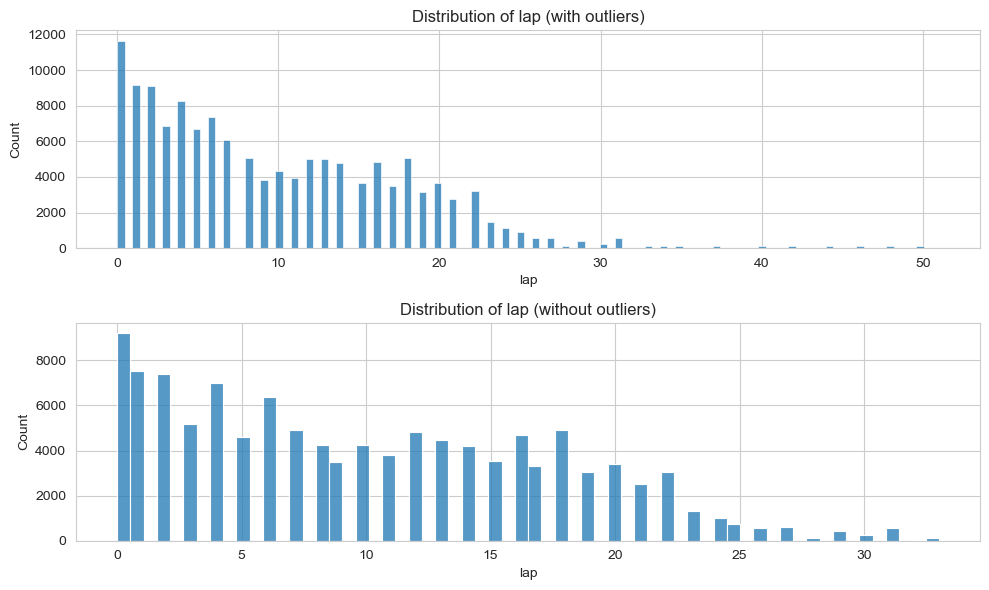

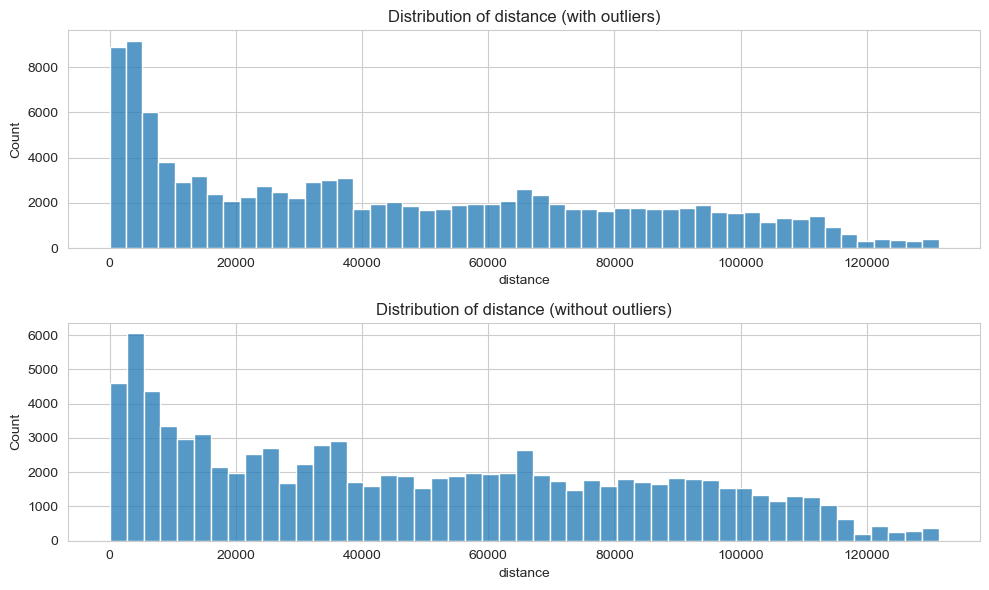

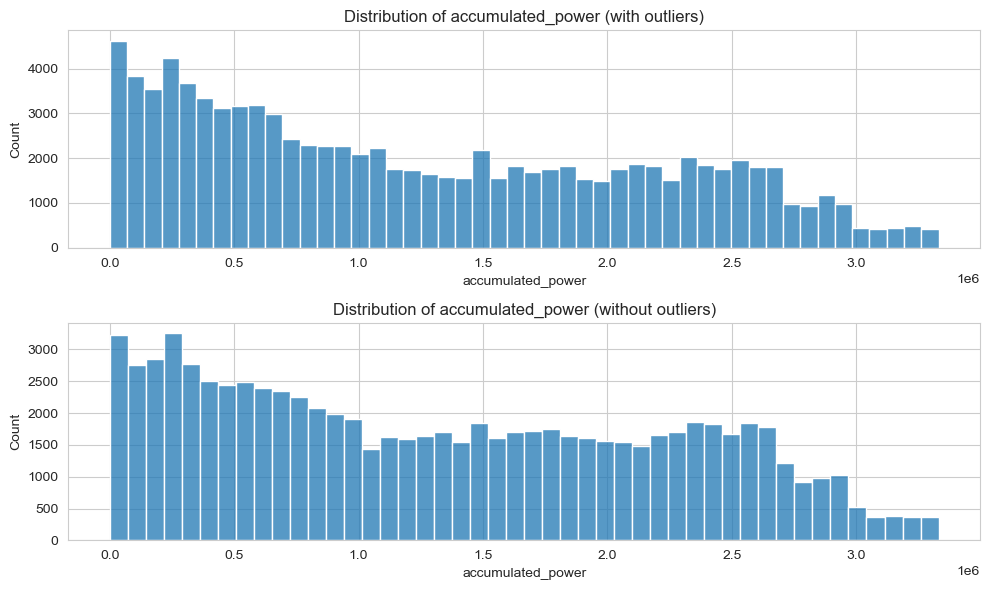

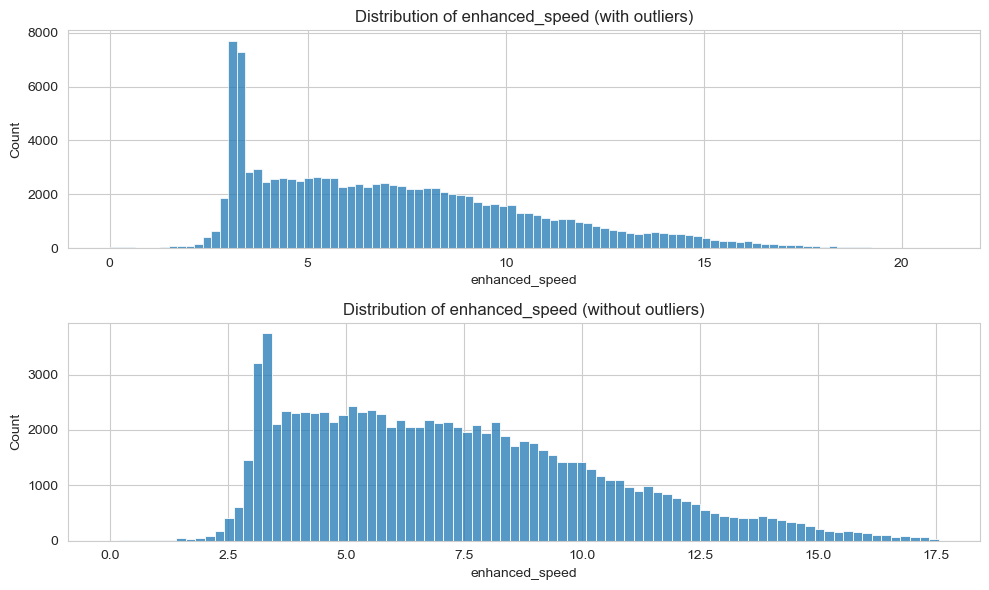

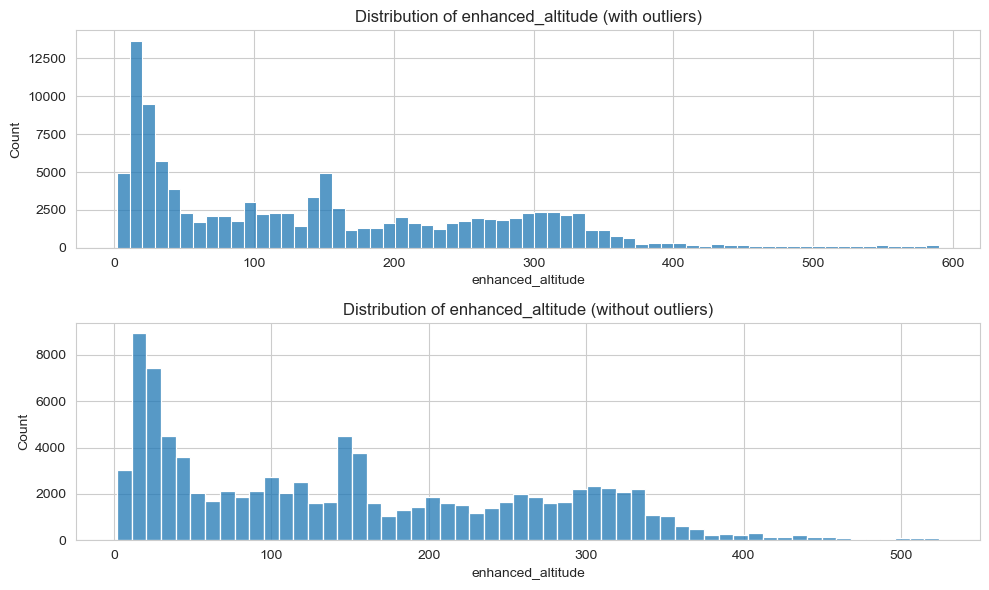

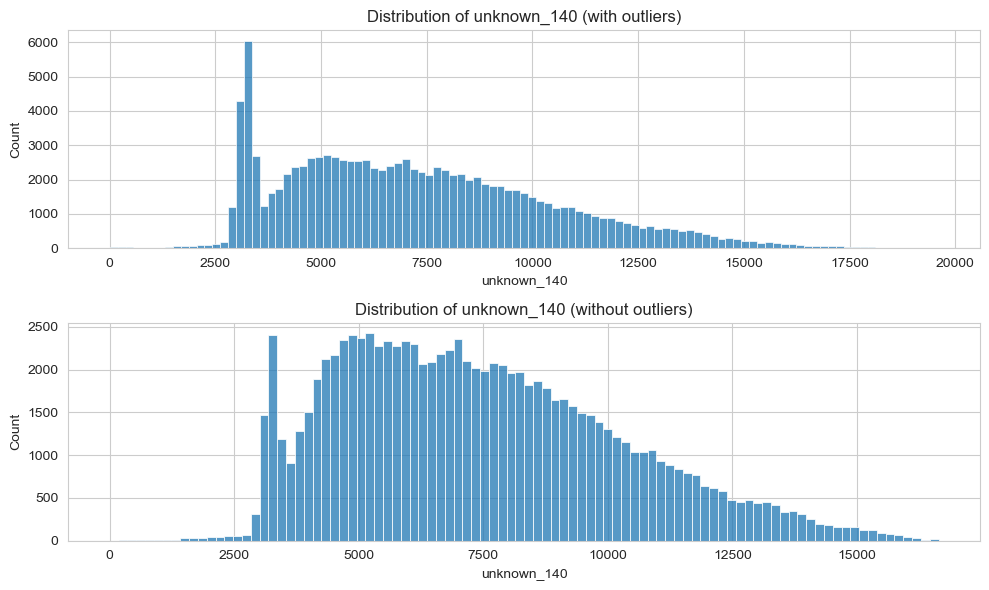

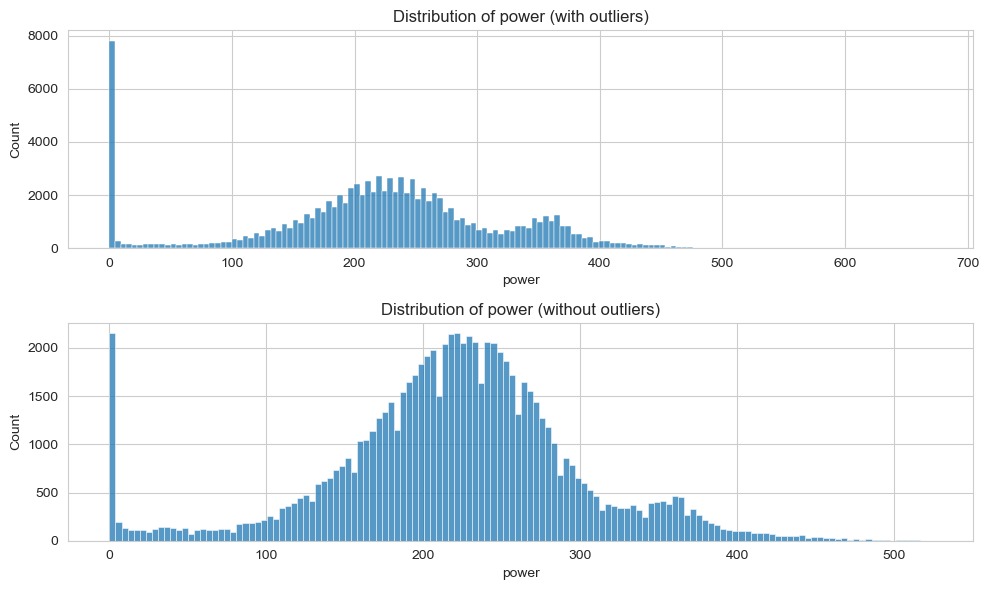

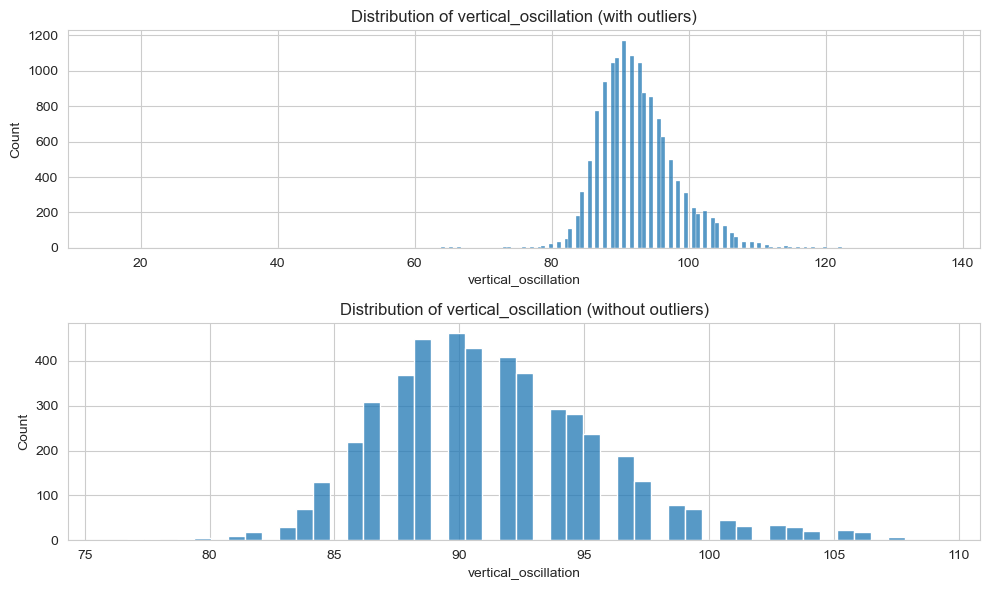

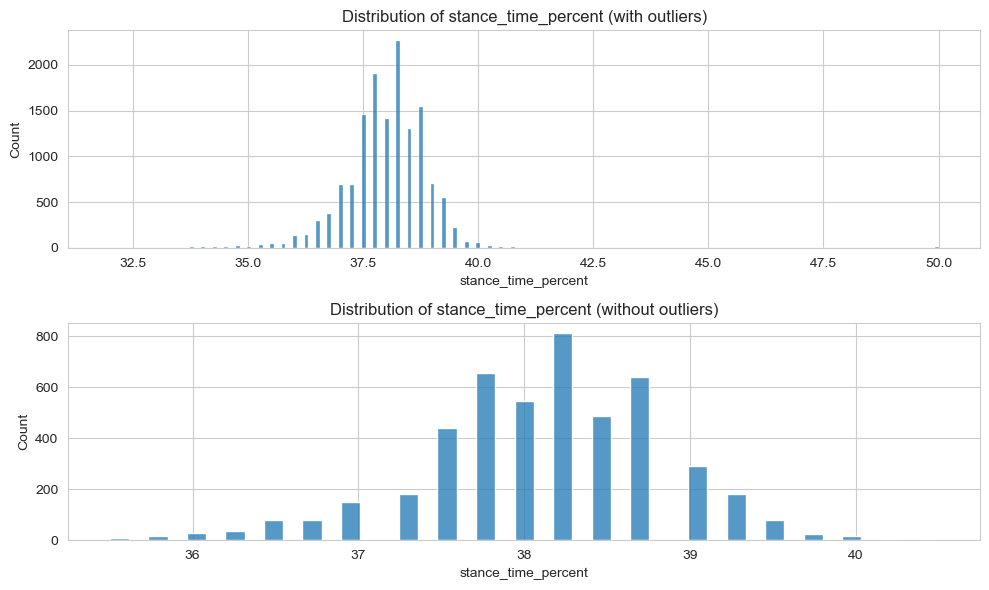

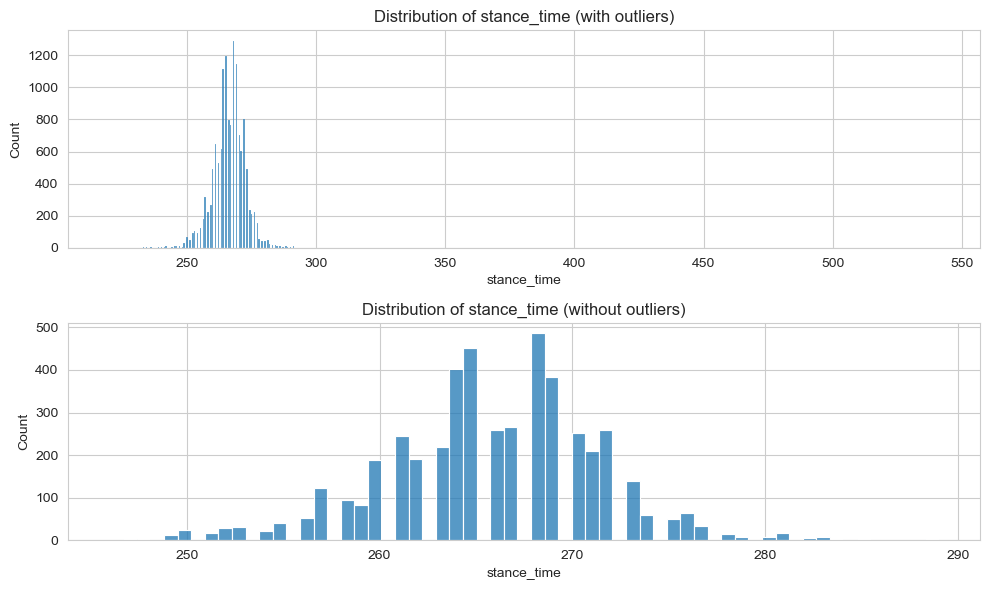

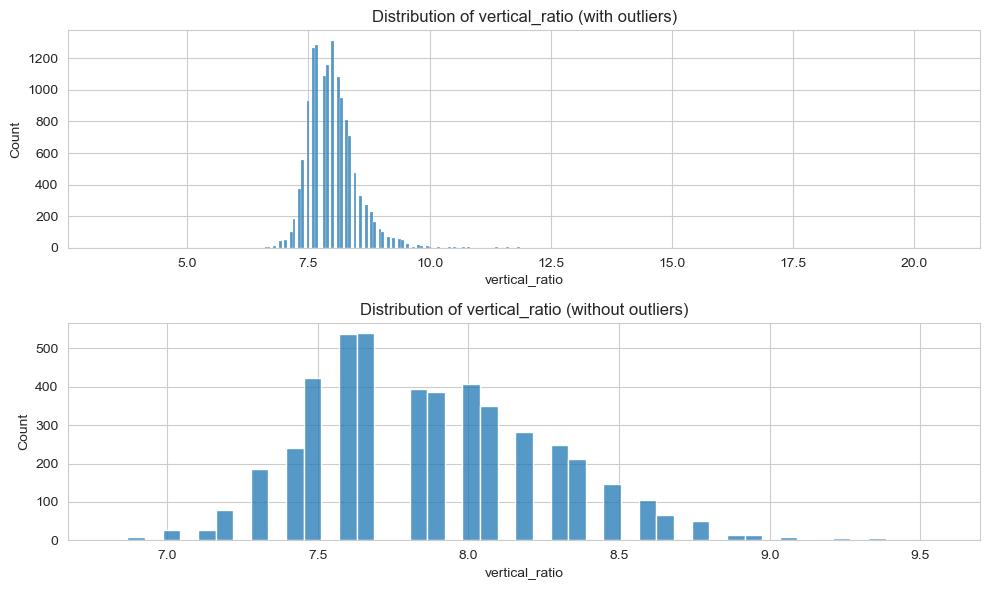

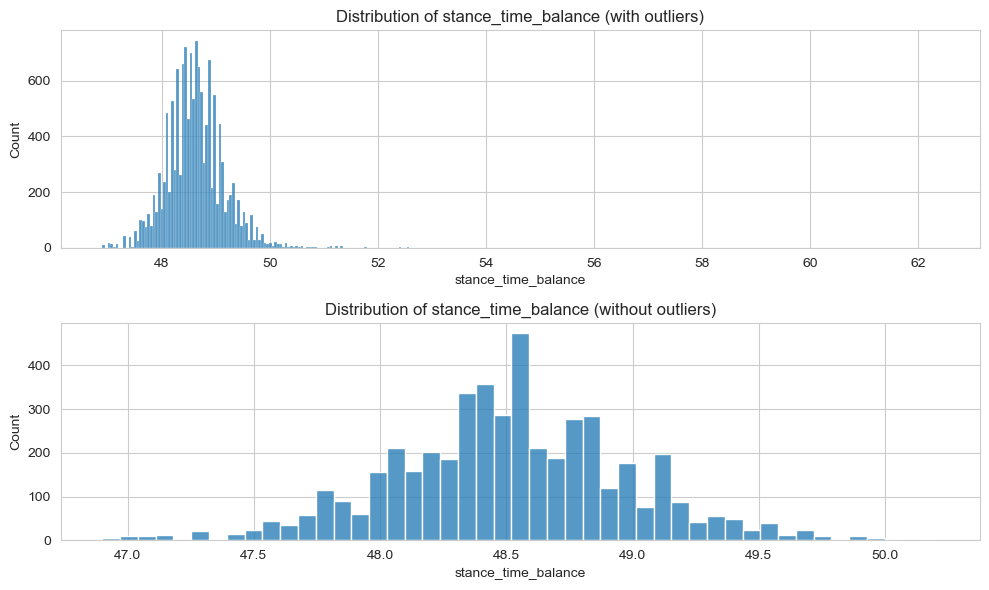

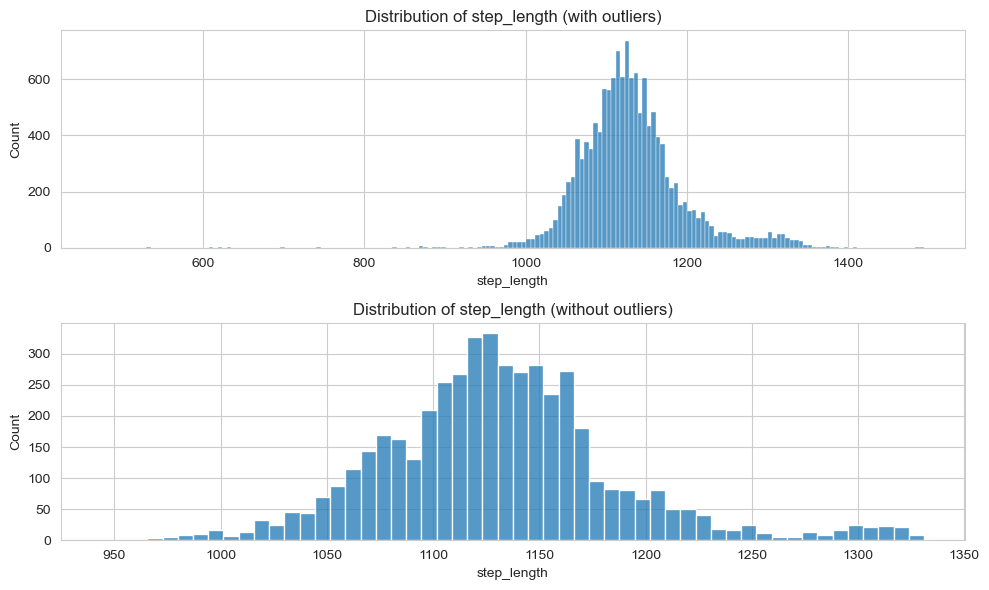

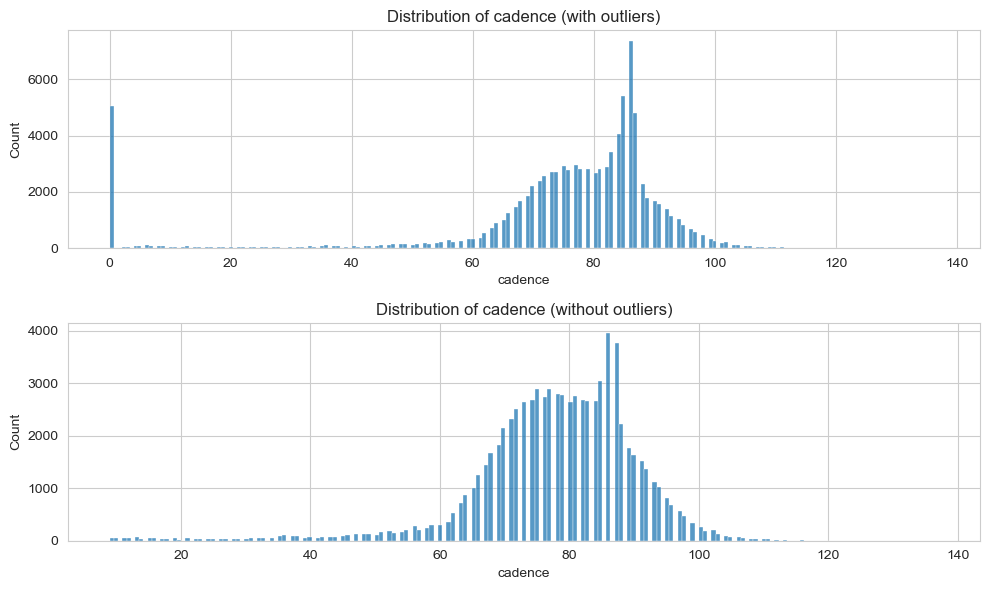

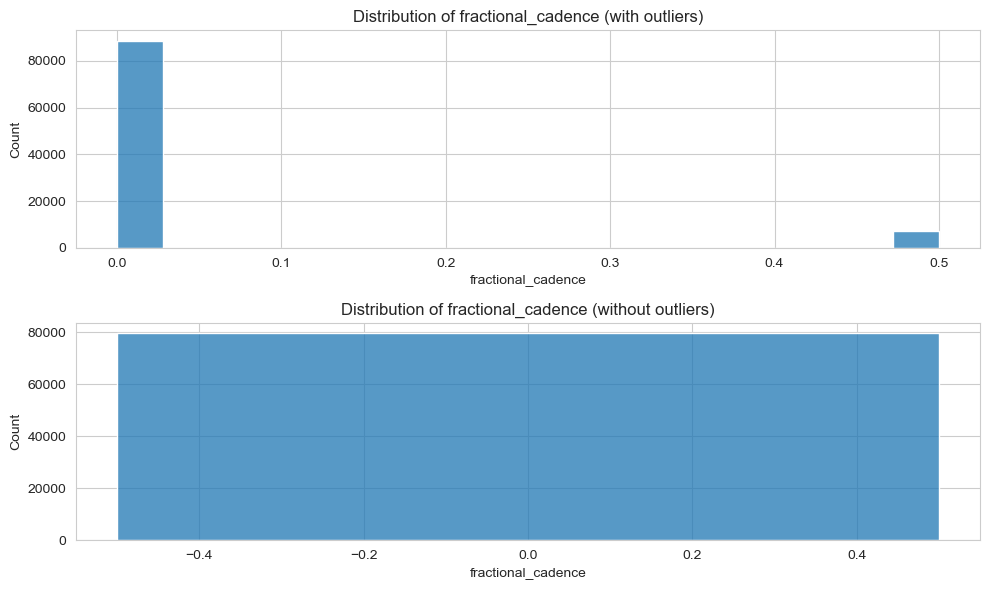

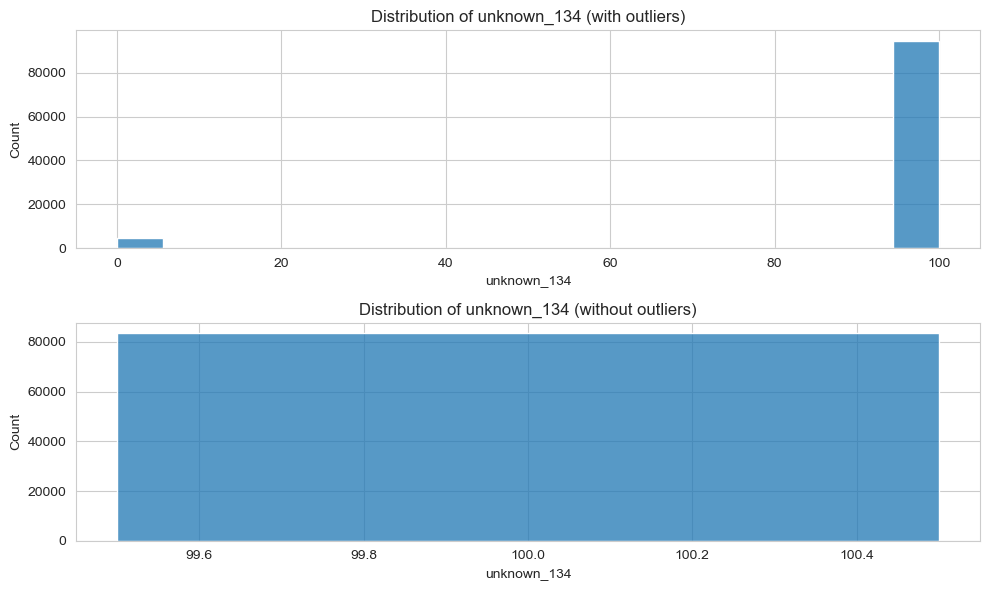

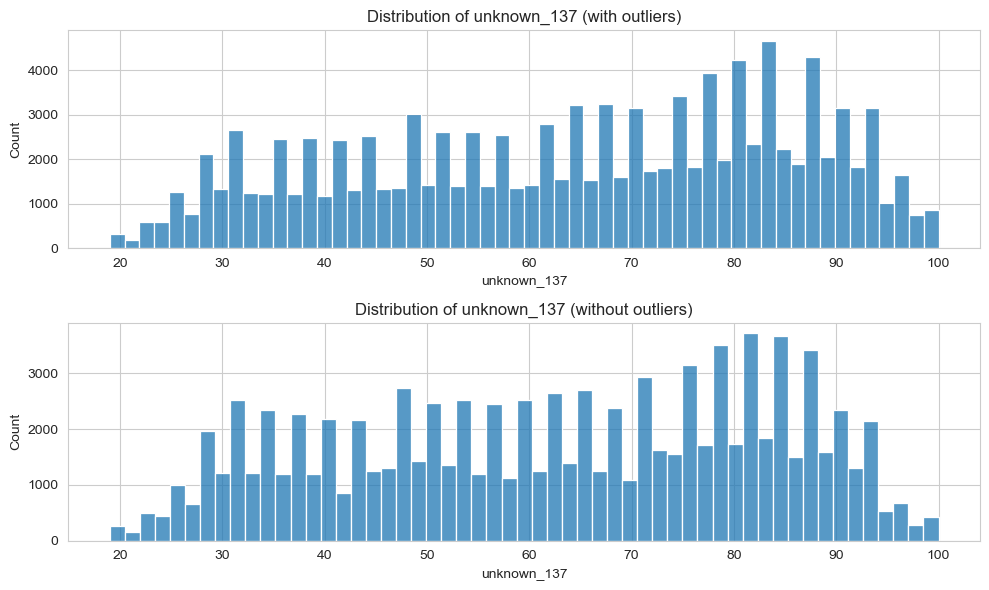

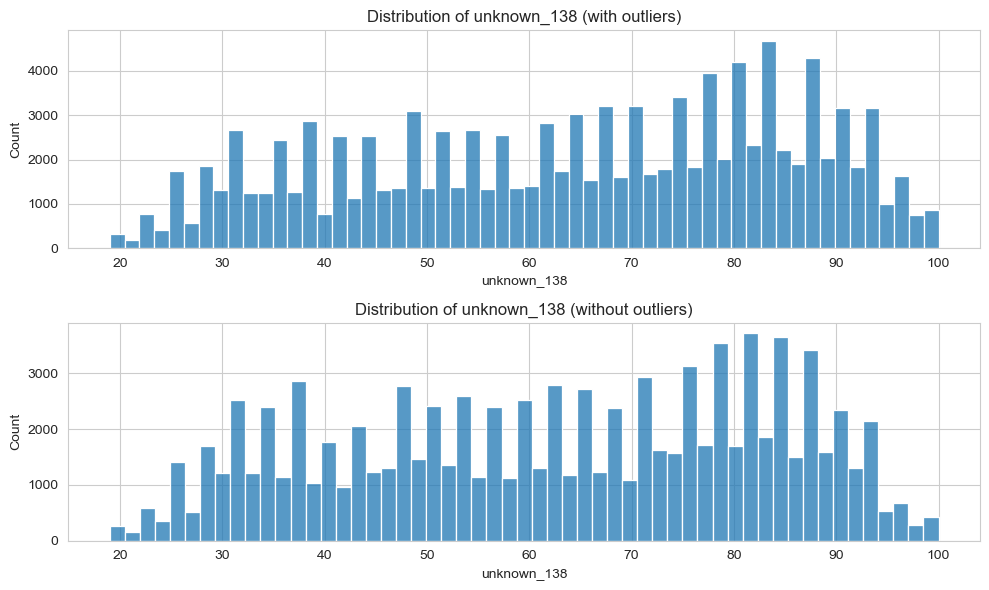

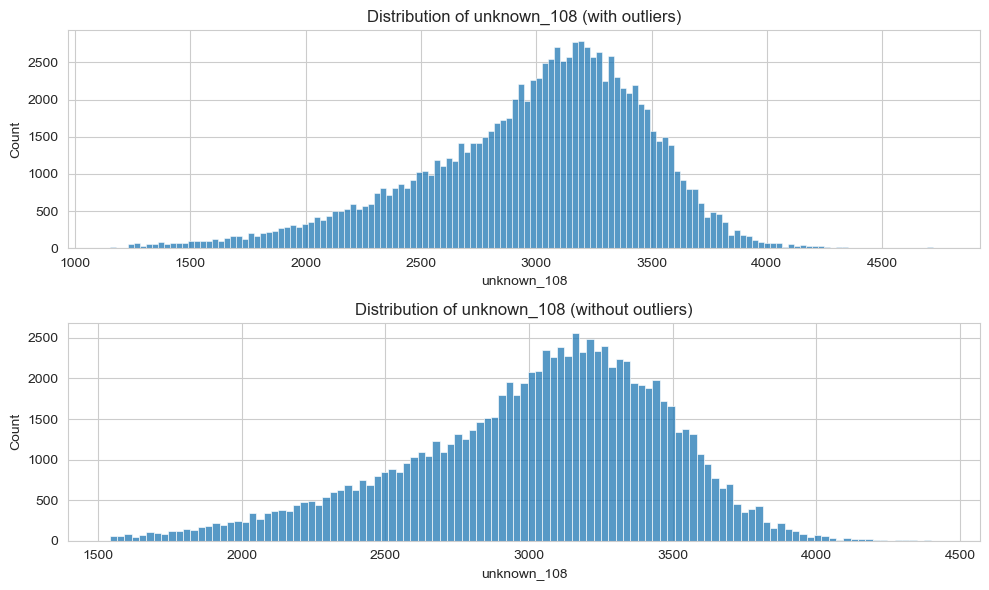

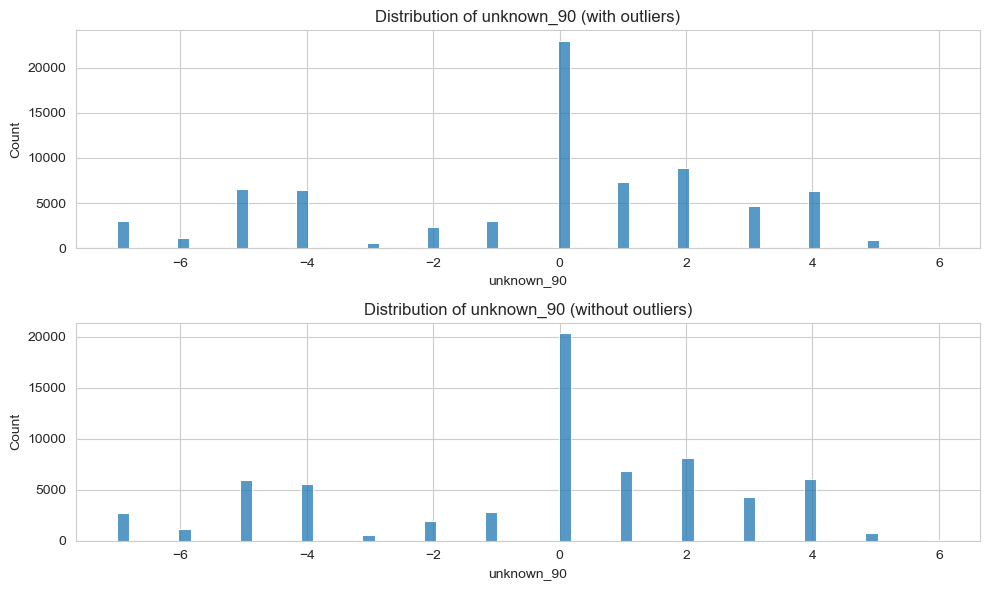

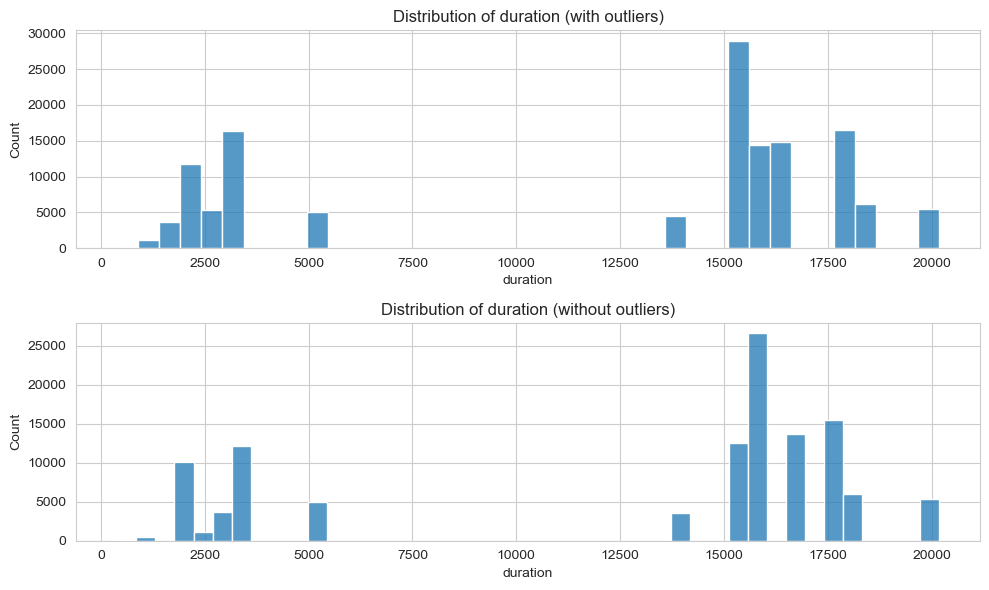

In [316]:
column_names = fit_df.columns

# Remove the excluded column from the column_names list
excluded_columns = ['Activity ID', 'sport', 'temperature','session','timestamp','latitude','longitude','unknown_87','activity_type','unknown_107']
column_names = [col for col in column_names if col not in excluded_columns]

# Calculate the z-scores for each numeric column
z_scores = pd.DataFrame()
for column in fit_df.select_dtypes(include=np.number):
    z_scores[column] = (fit_df[column] - fit_df[column].mean()) / fit_df[column].std()

# Define the threshold for identifying outliers
threshold = 3

# Identify outliers based on the z-scores
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Subset the dataframe to include only the non-outliers
fit_df_no_outliers = fit_df[~outliers]

# Visualize the distribution of each column before and after removing outliers
for column_name in column_names:
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    sns.histplot(fit_df[column_name])
    plt.title('Distribution of {} (with outliers)'.format(column_name))

    plt.subplot(2, 1, 2)
    sns.histplot(fit_df_no_outliers[column_name])
    plt.title('Distribution of {} (without outliers)'.format(column_name))

    plt.tight_layout()
    plt.show()

### TCX (example)

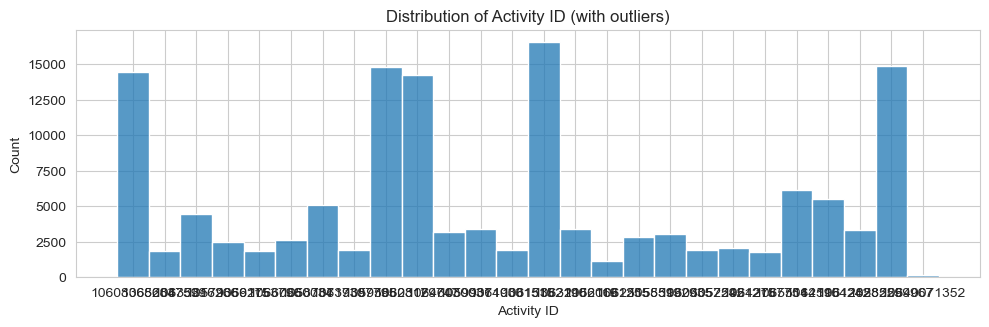

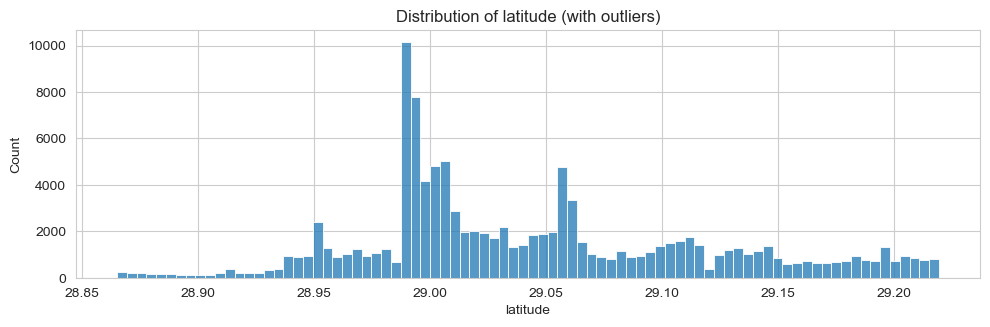

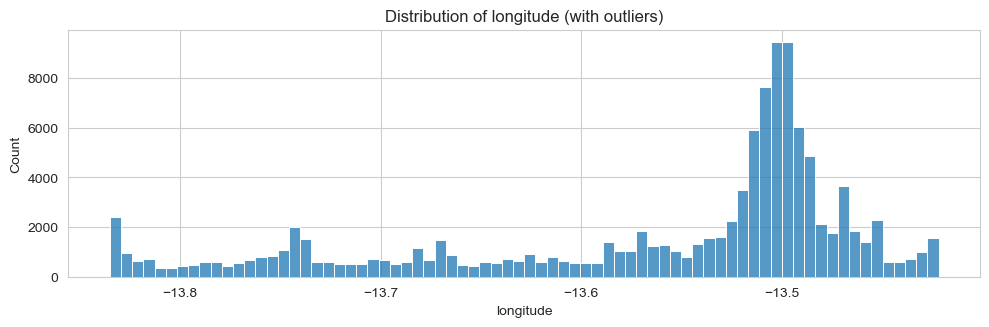

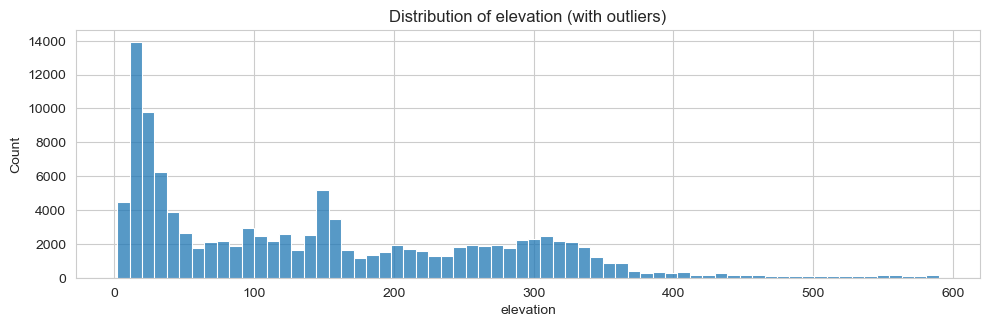

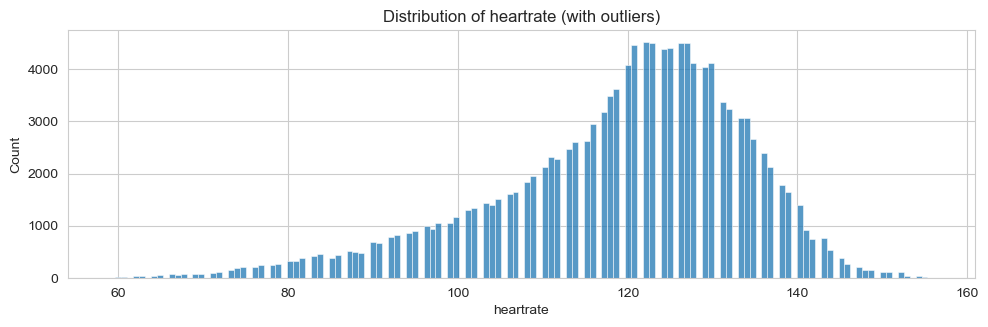

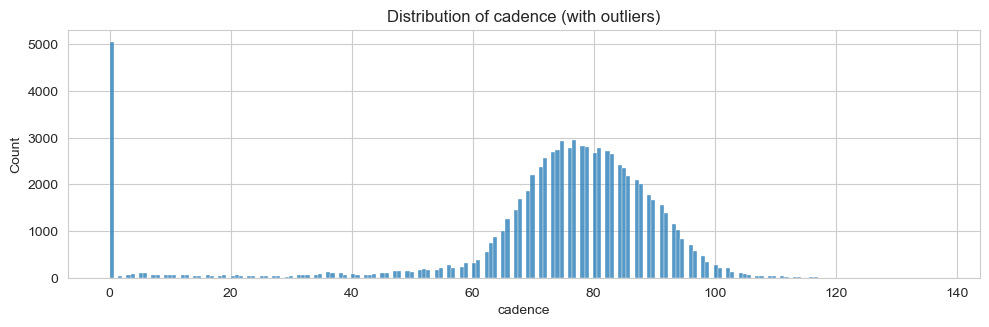

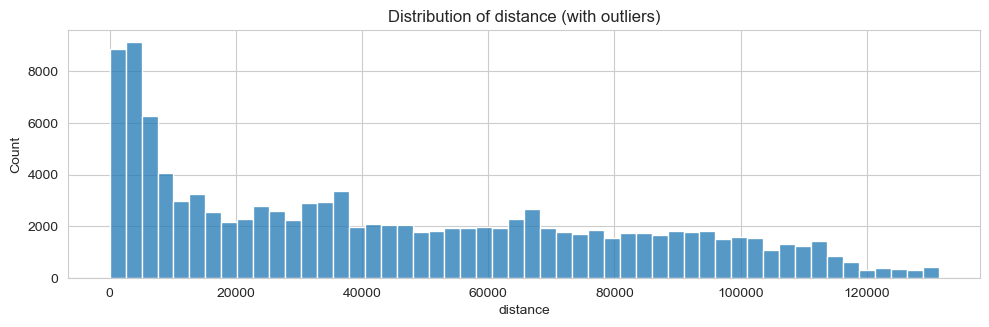

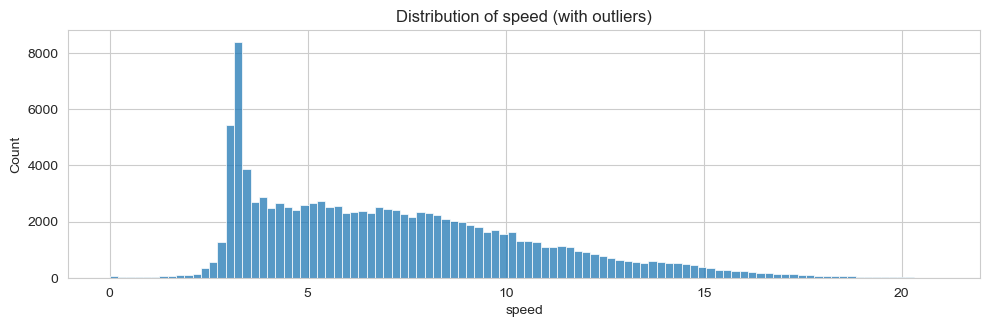

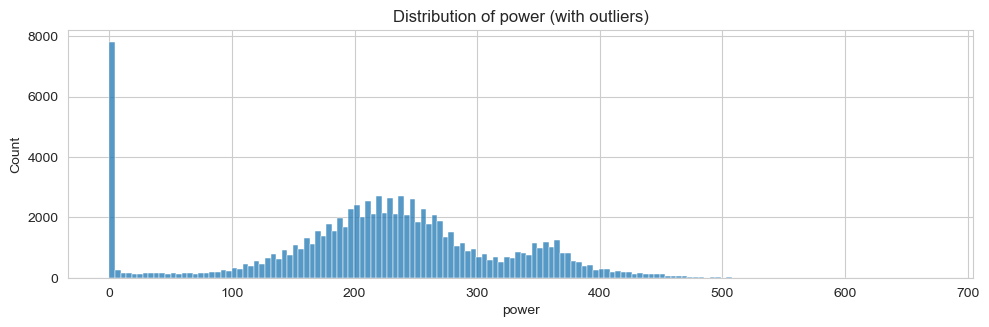

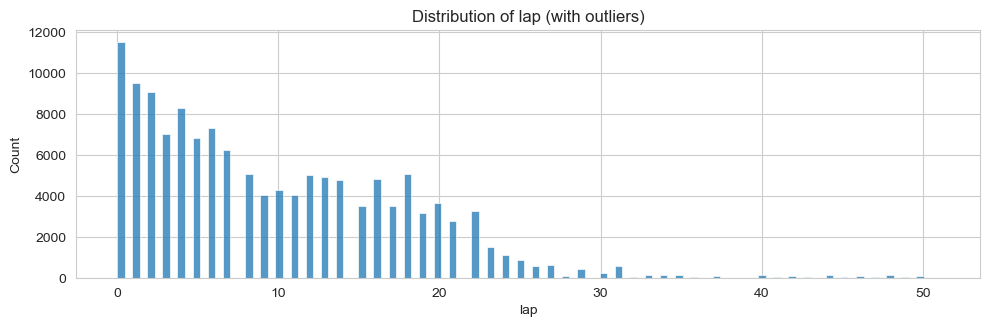

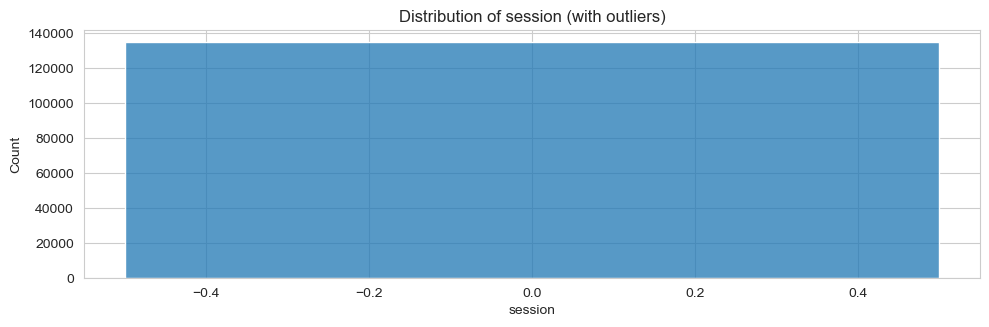

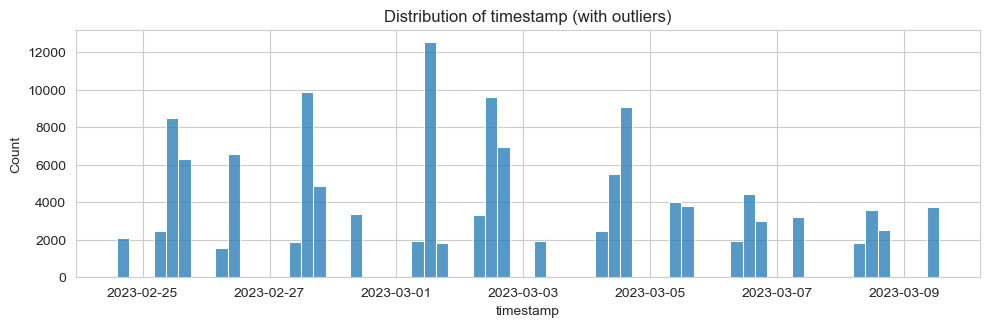

In [186]:
column_names_tcx = tcx_df.columns

# Remove the excluded column from the column_names list
column_names_tcx = [col for col in column_names_tcx if col != ['Activity ID']]

# Visualize the distribution of each column
for column_name in column_names_tcx:
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    sns.histplot(tcx_df[column_name])
    plt.title('Distribution of {} (with outliers)'.format(column_name))

    plt.tight_layout()
    plt.show()

## Additional Functionality

For the next step we add additional EDA procedures
We wanted to add the following functionality features for our EDA
 - Distribution analysis of features across different sports or time periods
 - Feature engineering to derive new relevant features

### Distribution Analysis

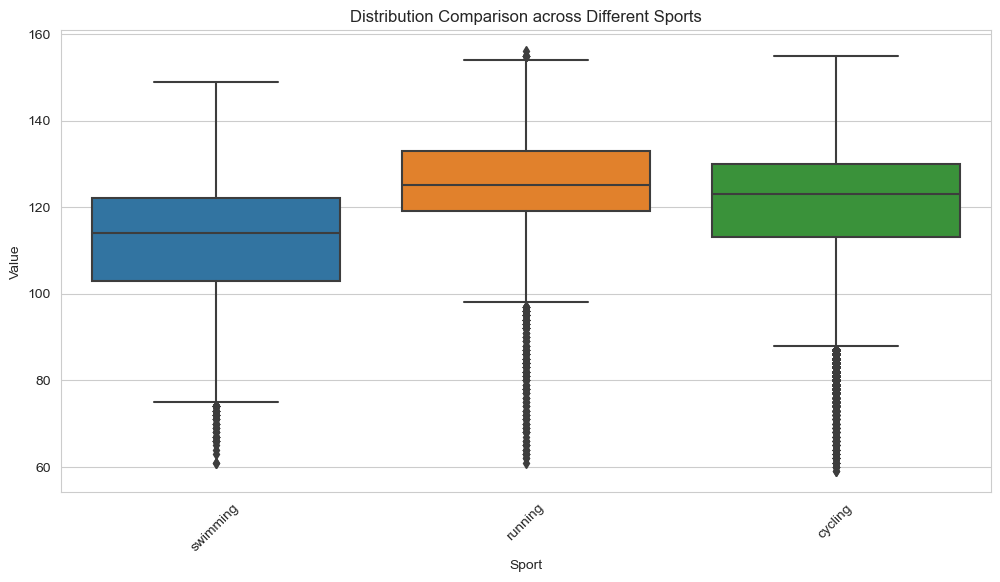

In [320]:
# Select the columns of interest for distribution analysis
columns_of_interest = ['heartrate', 'temperature', 'unknown_135', 'sport']

# Create a box plot to compare distributions across different sports
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y=fit_df['heartrate'], data=fit_df[columns_of_interest])
plt.title('Distribution Comparison Heartrate')
plt.xlabel('Sport')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

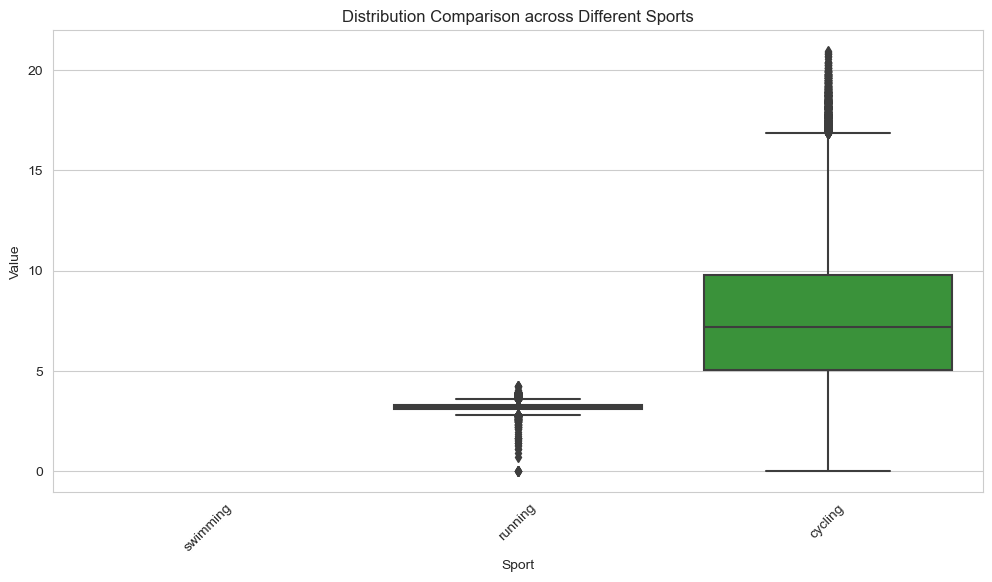

In [321]:
# Select the columns of interest for distribution analysis
columns_of_interest = ['heartrate', 'temperature', 'unknown_135', 'sport', 'duration', 'distance', 'enhanced_speed']

# Create a box plot to compare distributions across different sports
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y=fit_df['enhanced_speed'], data=fit_df[columns_of_interest])
plt.title('Distribution Comparison Enhanced Speed')
plt.xlabel('Sport')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

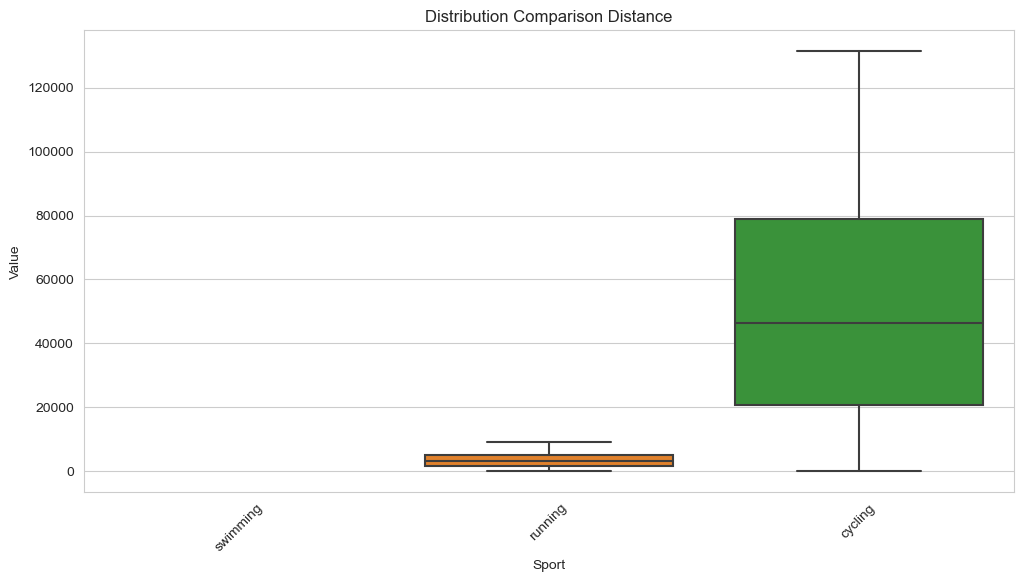

In [322]:
# Select the columns of interest for distribution analysis
columns_of_interest = ['heartrate', 'temperature', 'unknown_135', 'sport', 'duration', 'distance', 'enhanced_speed', 'cadence']

# Create a box plot to compare distributions across different sports
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y=fit_df['distance'], data=fit_df[columns_of_interest])
plt.title('Distribution Comparison Distance')
plt.xlabel('Sport')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

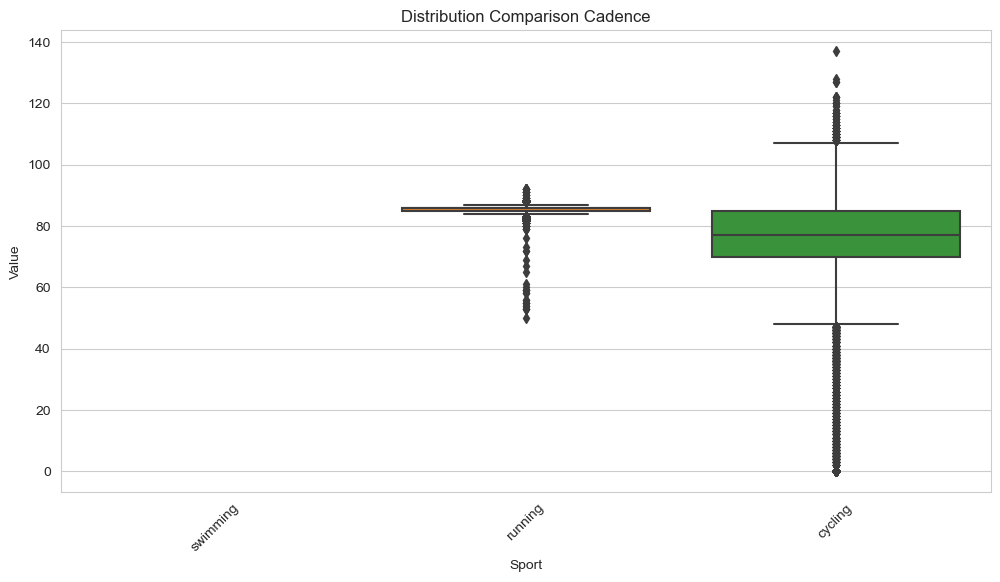

In [323]:
# Select the columns of interest for distribution analysis
columns_of_interest = ['heartrate', 'temperature', 'unknown_135', 'sport', 'duration', 'distance', 'enhanced_speed', 'cadence']

# Create a box plot to compare distributions across different sports
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y=fit_df['cadence'], data=fit_df[columns_of_interest])
plt.title('Distribution Comparison Cadence')
plt.xlabel('Sport')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

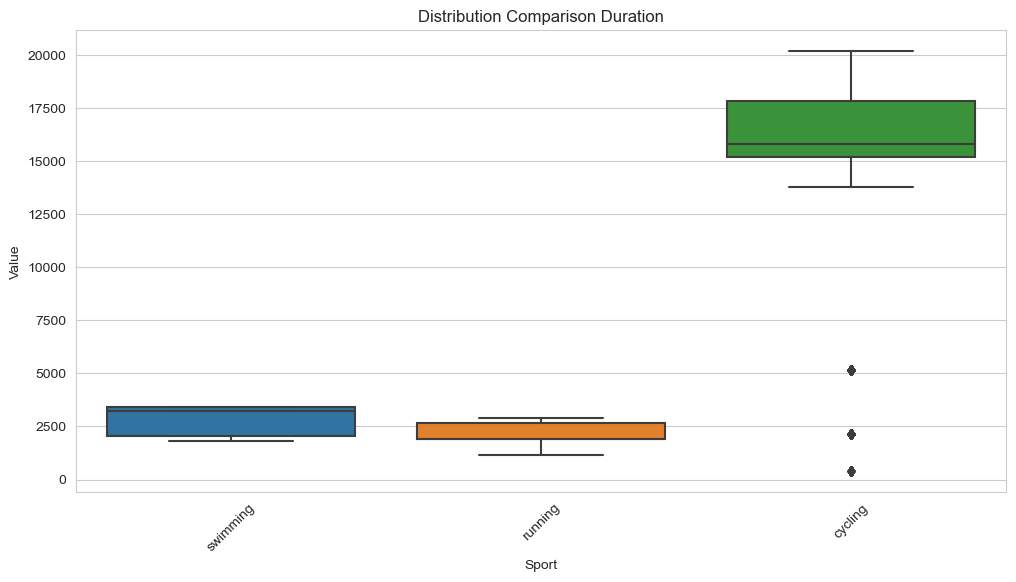

In [324]:
# Select the columns of interest for distribution analysis
columns_of_interest = ['heartrate', 'temperature', 'unknown_135', 'sport', 'duration', 'distance', 'enhanced_speed', 'cadence']

# Create a box plot to compare distributions across different sports
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y=fit_df['duration'], data=fit_df[columns_of_interest])
plt.title('Distribution Comparison Duration')
plt.xlabel('Sport')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

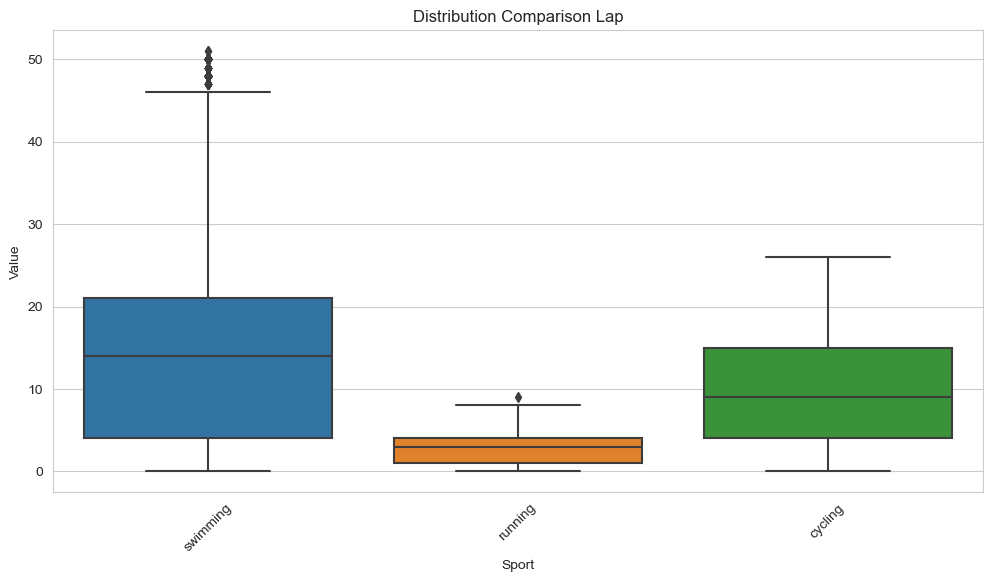

In [325]:
# Select the columns of interest for distribution analysis
columns_of_interest = ['heartrate', 'temperature', 'unknown_135', 'sport', 'duration', 'distance', 'enhanced_speed', 'cadence','lap']

# Create a box plot to compare distributions across different sports
plt.figure(figsize=(12, 6))
sns.boxplot(x='sport', y=fit_df['lap'], data=fit_df[columns_of_interest])
plt.title('Distribution Comparison Lap')
plt.xlabel('Sport')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

### Sport Prediction

In [354]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Use one-hot encoding
fit_df_calc = fit_df.drop(columns=['timestamp', 'activity_type'])
fit_df_encoded = pd.get_dummies(fit_df_calc)

# Create feature matrix X and target variable y
X = fit_df_encoded.drop(['sport'], axis=1)
y = fit_df_encoded['sport']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Print out shapes
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

# Use HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print classification report and accuracy score
print(classification_report(y_test, y_pred))
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

In [349]:
feat_importances = pd.Series(model.feature_importances_, index=X_features.columns)
#feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10));
feat_importances = pd.DataFrame(feat_importances)
t1 = feat_importances[feat_importances[0]<0.05]
t2 = feat_importances[feat_importances[0]>=0.05]
plt.barh(t1.index.values, t1[0], color='orange')
plt.barh(t2.index.values, t2[0], color='navy')

AttributeError: 'HistGradientBoostingClassifier' object has no attribute 'feature_importances_'

### Feature Engineering
To calcuate calories burned we decided to look at some textbook possibilities and the most important features to do that are:

Activity ID: Helps us to identify and track specific activities
Weight: The weight of the individual performing the activity is an important factor
Age: Age can influence the estimation of calories burned
Gender: Gender is considered in metabolic equations as it can affect the Basal Metabolic Rate (BMR) and calorie expenditure
Activity Type: Different types of activities have varying metabolic demands and energy expenditure. It helps categorize the activities for calorie estimation
Duration: The duration of the activity is necessary to calculate the total energy expenditure
Heartrate: The heartrate is a guideline in interaction with the other factors

(source: "Accuracy of Physical Activity Monitors for Energy Expenditure Estimation: A Systematic Review" - A. E. Evenson, D. Sotres-Alvarez, and R. C. Dengel.
"Heart Rate Monitoring for Estimation of Energy Expenditure" - T. G. Berntsen, J. Hageberg, and T. A. Andersen.
"Validation of Energy Expenditure Prediction Models Based on Heart Rate and Accelerometry" - A. Brage, N. W. Brage, and S. Ekelund.)

In [ ]:
# A possible way to calculate the calories burned would be

def calculate_calories_burned(weight, age, gender, activity_factor, duration):
    if gender == 'male':
        bmr = (10 * weight) + (6.25 * height) - (5 * age) + 5
    elif gender == 'female':
        bmr = (10 * weight) + (6.25 * height) - (5 * age) - 161
    else:
        raise ValueError("Invalid gender")

    calories_burned = bmr * activity_factor * (duration / 1440)
    return calories_burned